# <center><span style='font-family:Garamond'>Time Series Analysis for Forecasting Monthly VIX Index

## <center><span style=font-family:Garamond> Young Jun Jeong <br><br> April 8, 2022

# <span style='font-family:Garamond'> 1.   Abstract

<font size="4">
<span style='font-family:Garamond'>
The objective of the following study is to analyze the time series data on monthly VIX index data over past 20-30 years, building a forecast model by adapating Box-Jenkin's method. We test and run diagnostics of the model to transform the data into the most effective way to fit the best-fitting forecast model. For each steps of the Box-Jenkin's, an interpretation of visual and numerical clues of the statistics and plots is drawn but also interpretted in a conceptual aspect relative to the in-real-life instances. The result of the analysis is fitting an ARMA(1,1) model that is built over Box-Jenkin's methology and the model is found to most of test data, however, in the conclusion of the study, the limitation and credibility of how the time series analysis might be able to catch and solve by predicting the future under severe data inhomogeneity by uncertainity is discussed.

# <span style='font-family:Garamond'> 2. Introduction

<span style='font-family:Garamond'>
<font size="4">
    
Over the past few years, many critical global events, most prominently, the COVID-19 pandemic that is still ongoing now, which started in earnest in early 2020 have ratcheted up the urgency and tension of the investors’ confidence along with the 2022 Russian Invasion of Ukraine occurred recently. Also, referring to the data of several more years ago, well-known global financial turmoils, for example, the Subprime Mortgage Crisis in 2008, which recorded the highest financial chaos index in history and Brexit happened in 2016, which had not much impact eventually in long term; we can still observe$^{[1]}$ that the psychological pressure behind the scene induces investors to take their mass disposal into immediate action which is one of the reasons that market volatility increases during those occurrences.
    
A CBOE Volatility Index, also known as “VIX” is a barometer of the market expectations on the volatility of the S&P 500 index listed on the Chicago Board Options Exchange for 30 days henceforth. Here, this VIX index measures the quantified fear of investors in the stock market forementioned above, and so it is called the “Fear Index” as well. As a brief way on how to read a single VIX index value, let us say the VIX index is recorded as 30 on a certain reference time, we can interpret it as from the reference time of the VIX recorded we looked at, the stock price is expected to fluctuate about 30% over 30 days period. Stock prices, in general, tend to collapse on a high VIX index value. There are also indicators so-called “thresholds of decision” where a VIX index below 20 is referred to as an “excitation interval” which indicates an overbought and suggests the sale of the stocks, whereas a VIX index above 40, like the aforementioned Lehman Brothers Crisis, Dot-com Bubble in 1999s, also known as IT Bubble, and also European Debt Crisis, is referred to as a “fear interval”, indicates oversold, hence suggests the purchase of stocks.
    
From the Monthly Volatility with the major crises labelled on$^{[1]}$,  we can somehow notice some sort of segments that can partition certain several periods of time in years or a decade based on the behaviour and hence the shape of the visualized monthly volatility index. This is called the “Volatility Regime”, similar to market regimes that consist of clusters of persistent market conditions. “Financial markets have the tendency to change their behaviour over time, which can create regimes or periods of fairly persistent market conditions…Modelling various market regimes…can enable macroeconomically aware investment decision-making and better management of tail risks.” (Insights by Mike Nigro, Insights by Geoff Duncombe, & Insights by Jeffrey N. Saret, 2021). The volatility regimes are that it will enable us to build a time series model for forecasting the close future VIX index value.

Prior to the analysis of our time series data on monthly VIX index data, one corcerna about the analysis is brought, that is about the doubt conservativeness of a certain forecasting model that is going to be built and regardless of the forecasting model, whether even if it somehow succeeded to catched the trend of our data or not. We may question ourselves of the behaviour of how should we interpret about the model we built in terms of usability or if failed to build an effective model, then the reason of failures either regards to the technical problem or some unexplained factors we are not yet able to explain that is from the nature of uncertain future.
    
Taking the merit of using the volatility regimes, in this current study, an approach of dissecting the original given time series data of the monthly VIX index from January 1990 to December 2019 by each given volatility regime$^{[3]}$ will be adopted. Referring to the colourized volatility regimes plot$^{[2]}$, the behaviour of a regime in the VIX index changes almost completely the new force strikes in, that is to say, every volatility regime here pertains to for a certain period of time until another impactive intervenes, and when a new volatility regime is created the previous volatility regime is terminated. On this account, the impacts of the past first five volatility regimes on the 6th volatility regime (the lastest regime provided), will be assumed to be negligible in this study, hence only considering and analyzing the data in the sixth regime in terms of building and testing a model forecasting the time series data of upcoming future.
    <span/>

#  <span style='font-family:Garamond'> 3. Model Specification

## <span style='font-family:Garamond'> 3.0. Data Preparation

### <span style='font-family:Garamond'> 3.0.1 Importation and Summary of the Original Raw VIX Index Data 

<font size="4">
<span style='font-family:Garamond'>
The following imported original monthly VIX index dataset is consisted of two variables: (1) VIX and (2) Date. The 'VIX' variable indicates the VIX index recorded monthly, on every 1st of the month in a type of double vector which is capable of containing numbers, infinities, or any missing and invalid data points. The 'Date' variable indicates the date recorded the monthly VIX index over 32 years, starting from February 1, 1990 to December 13, 2021. The VIX index recorded is ranged between 9.51 to 59.89 with the VIX index on average of 19.57.

In [148]:
# Importing csv file of Monthly VIX Data
VIX_Data <- read_csv("./Data.csv", col_types = cols());

# Summary of imported Monthly VIX Data
summary(VIX_Data)

      Date                 VIX       
 Min.   :1990-02-01   Min.   : 9.51  
 1st Qu.:1998-01-24   1st Qu.:13.77  
 Median :2006-01-16   Median :17.75  
 Mean   :2006-01-15   Mean   :19.57  
 3rd Qu.:2014-01-08   3rd Qu.:23.50  
 Max.   :2021-12-13   Max.   :59.89  

### <span style='font-family:Garamond'> 3.0.2 Segmentation of the VIX Data (Extracting the 6th Segment)

<font size="4">
<span style='font-family:Garamond'>

As the segmentation approach mentioned above, we partition the VIX Data based on the given table$^{[3]}$ of the segments by each time period. Notice that the sixth regime displays that the period is upto December 2019. The raw dataset of sixth regime: ```regime6``` contains 120 observations in total.

In [195]:
indexfind <- function(){
list <- list()
for(i in 1:nrow(VIX_Data)){
        if(VIX_Data[i,1] %in% seq(as.Date('2010-01-01'), as.Date('2019-12-31'), by="days")){
            if(length(list)==0){
                list[length(list)+1] <- i
            }
            else{
                list[2] <- i
                }
            }
    }
return(c(list[1][[1]],list[2][[1]],toString(VIX_Data[list[1][[1]],][[1]]),
         toString(VIX_Data[list[2][[1]],][[1]])))
}

ind <- as.numeric(indexfind()[1:2])
dates_raw <- indexfind()[3:4]
regime6 <- VIX_Data[ind[1]:ind[2],]

summary(regime6)
sprintf("The sixth regime dataset begins from %s to %s and the incides are %s:%s", 
        dates_raw[1], dates_raw[2], ind[1], ind[2])
sprintf("The regime6 dataset contains %s observations in total.", nrow(regime6))

      Date                 VIX       
 Min.   :2010-01-01   Min.   : 9.51  
 1st Qu.:2012-06-23   1st Qu.:13.44  
 Median :2014-12-16   Median :15.90  
 Mean   :2014-12-16   Mean   :17.09  
 3rd Qu.:2017-06-08   3rd Qu.:18.94  
 Max.   :2019-12-01   Max.   :42.96  

[1] "The sixth regime dataset begins from 2010-01-01 to 2019-12-01 and the incides are 240:359"

[1] "The regime6 dataset contains 120 observations in total."

### <span style='font-family:Garamond'> 3.0.3  Splitting Data into Train Dataset (95%) / Test Dataset (95%)

<font size="4">
<span style='font-family:Garamond'>
    
From the dissected data, the collection of time series data that falls into sixth regime ```regime6```,will be partitioned into two parts of dataset for the validation of the forecast model that we are going to build later in this study. The training dataset will be set to have 95% of the sixth regime data and the test dataset will contain the rest 5% of the original sixth regime data. The training dataset contains 114 observations from the sixth regime dataset and the test dataset contains 6 observations from the sixth regime dataset. From the model specification to the model decision in this study, we will use the train data, and for the evaluation of the forecasting performance, the test dataset will be used.

In [1043]:
# Conversion of Data into Time Series Data 
regime6_VIX <- regime6$VIX
regime6$Date <- as.Date(regime6$Date)
regime6_Date <- regime6$Date
regime6_xts <- xts(regime6_vix, regime6_Date)
colnames(regime6_xts) <- "VIX"

# Splitting Data Set: Train (90%) / Test (10%) 
n <- length(regime6_xts)
pTest = 0.05
nTrain <- n - floor(pTest*n)
nTest <- n - (n-floor(pTest*n)+1) + 1
train <- regime6_xts[1:nTrain]
test <-regime6_xts[(nTrain+1):n]

# Train dataframe and Test dataframe saved for trend fitting later in this study
train.df <- as_tibble(data.frame(Date=regime6_Date[1:nTrain], VIX=regime6_VIX[1:nTrain]))
test.df <- as_tibble(data.frame(Date=regime6_Date[(nTrain+1):n], VIX=regime6_VIX[(nTrain+1):n]))

# Number of observations for Train and Test set
sprintf("The training set contains %s observations and the testing set contains %s observations", nTrain, nTest)

[1] "The training set contains 114 observations and the testing set contains 6 observations"

## <span style='font-family:Garamond'> 3.1. Exploration and Analysis of Data Set

### <span style='font-family:Garamond'> 3.1.1 Time Plot and Mean-Level Plot of Train Data

<font size=4>
<span style='font-family:Garamond'>
The time plot of the training data visualizes the fluctuations of the monthly VIX index data points over the period of the sixth regime, from 2010-01-01 to 2019-12-01.
    
In this time plot, we notice a downward trend proceeding in the process. Also, we can observe a spiking volatility index in mid 2011, which is caused by United States 2011 Debt-ceiling Crisis$^{[1]}$. This descending trend and spikes visualizes some clues to doubt the stationarity of this time series. In order to fit our forecast model by using a stationary model for ARMA, and if the original time series is non-stationary, then it would be reasonable to consider a transformation of this time series into a stationary time series regards to the presence of a clearcut downward trend. <br>

To detect the features of this process more precisely, we make a further investigation by examining over other different visualized tools as well to detect the features of this process more precisely. Here, we use a mean-level plot, also known as a cumulative mean plot visualizes the fluctuation of the average of the time series data. In our mean-level plot, the average monthly VIX index recorded according to the timeline in years. In a mean-level plot, if a time series stationary, it is expected to have its mean-level to be neutralized, that is to say, the mean-level value somehow is necessary to show a behaviour of converging to a certain constant value as time goes by. The following process has a mean-level descending upto the third quarter season of 2017 but eventually gets neutralized for the rest of the time, hence we could also expect a stationarity from the original time series if our speculation is tested acceptable but as mentioned, we need more precise examination of the time series including stationarity tests.

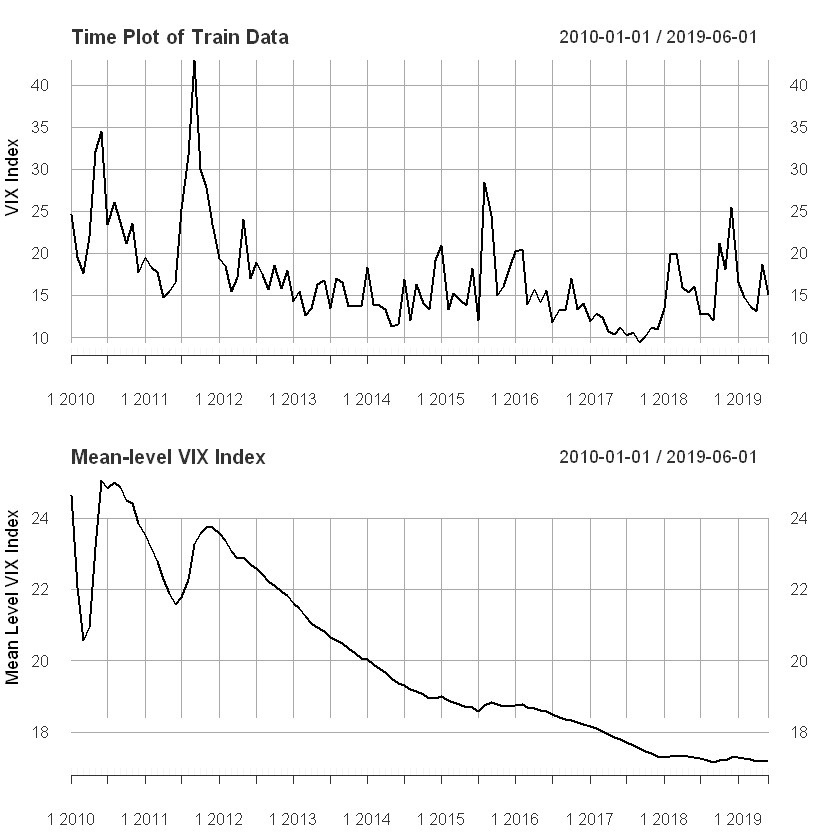

In [750]:
# Time Plot of Train Data
par(mfrow=c(2,1))
plot.xts(train, type="l", xlab="Time (months)", ylab="VIX Index", main="Time Plot of Train Data")

# Cummulative Mean Plot (Mean-Level Plot) of Train Data
cummeantrain <- cumsum(train) / seq_along(train)
plot.xts(cummeantrain, type="l", xlab="Time", ylab="Mean Level VIX Index", main="Mean-level VIX Index")

### <span style='font-family:Garamond'> 3.1.2 ACF and PACF Plot of Train Data

<font size=4>
<span style='font-family:Garamond'>
By observing ACF and PACF of the process, we are able to detect the probable signatures of the process, which will help us to choose the dominance of autoregressive terms and moving average terms of the model. We can observe sort of a dominant but weak AR signature from this ACF plot since it displays somewhat exponential decays but cuts off ,at lag value around $k=16$. Observing an PACF plot is helpful for carrying out more informative model signature detection. The PACF plot cuts off at $k=1$, ignoring one significant lag value that crossed the blue-band (thresholds) at $k=9$. However, then have several significant values at high order of lags near $k=70$. Performing ADF Unit Root Test and KPSS Stationary Test enables us to determine the prescene of stationarity precisely.

numeric(0)

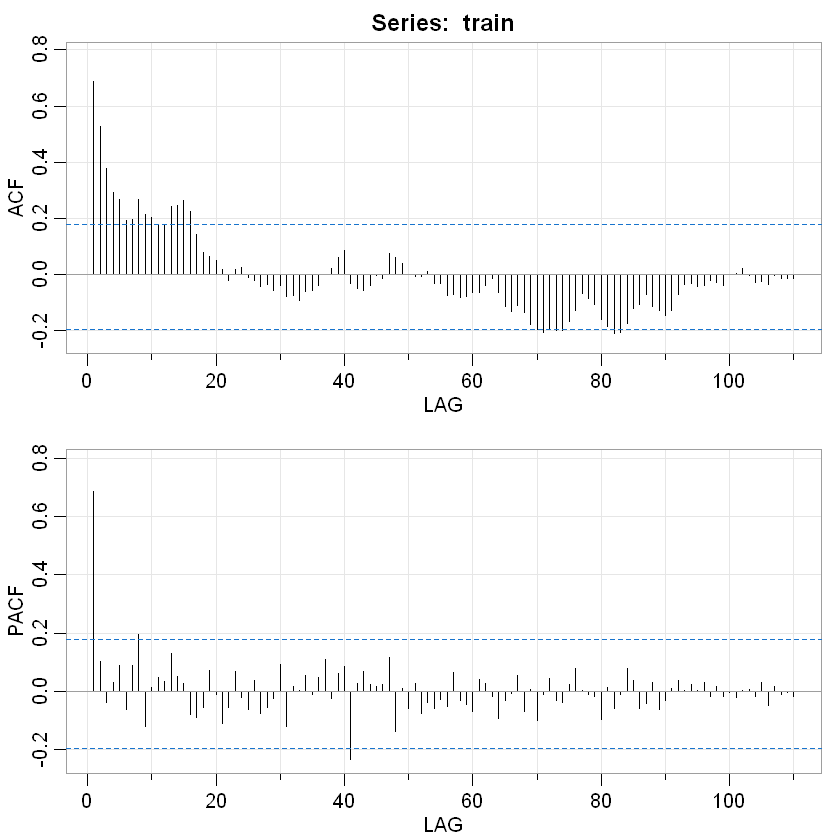

In [751]:
# Sample ACF and PACF Plot of Train Data
astsa::acf2(train, max.lag=110)[0]

### <span style='font-family:Garamond'> 3.1.3 ADF Unit Root Test and KPSS Stationary Level Test

<font size=4>
<span style='font-family:Garamond'>
The ADF unit root test and KPSS test for level and trend stationarity assumption on this original process shows contradictory result, where the ADF test rejected its null hypothesis of non-stationarity of the process at the 5% significance level since the p-value: $0.03856\lt0.05$ but the both KPSS tests of null hypotheses assuming level stationarity and trend stationarity of the process is rejected at 5% significance level as the p-values: $0.01\lt0.05$ and $0.03419\lt0.05$ respectively. "ADF concludes stationary and KPSS concludes non-stationary – The series is difference stationary." (G., 2021). Both KPSS tests did not conclude a firm diagnosis of the process, so we have two cases to consider: 
    
- (1) The series is trend stationary, the process that can removed the deterministic trend
- (2) The series is a difference stationary
    
Therefore, the detrending and/or differencing has to be carried out for the transformation of the process into a stationary process for fitting a model.

In [752]:
adf.test(train, alternative ="stationary")$p.value
kpss.test(train, null ="Level")$p.value
kpss.test(train, null='Trend')$p.value


	Augmented Dickey-Fuller Test

data:  train
Dickey-Fuller = -3.5757, Lag order = 4, p-value = 0.03856
alternative hypothesis: stationary


Warning message in kpss.test(train, null = "Level"):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  train
KPSS Level = 0.99512, Truncation lag parameter = 4, p-value = 0.01



	KPSS Test for Trend Stationarity

data:  train
KPSS Trend = 0.16498, Truncation lag parameter = 4, p-value = 0.03419


### <span style='font-family:Garamond'> 3.1.4 Sieve Bootstrap Based Test for the Null Hypothesis of no Trend

In [753]:
funtimes::notrend_test(train, test="t")$p.value # Ha: has a Linear Trend 
funtimes::notrend_test(train, test="MK")$p.value # Ha: has a Monotonic Trend
funtimes::notrend_test(train, test="WAVK")$p.value # Ha: has Any Trend

[1] 0.009

[1] 0.002

[1] 0.004

<font size=4>
<span style='font-family:Garamond'>
    
Using `notrend_test()` function from `funtimes` r-package, we can briefly check that for each alternative hypothesis of having (1). Linear Trend, (2) Monotonic Trend, (3) Any Trend against the null hypothesis of no trend in the time series, all alternative hypothesis rejected the null hypothesis in a very significant p-values of $0.005, 0.002, 0.007$, respectively. On the next step, among different approaches of fitting deterministic trend, we will start off by fitting a linear trend on the process.

##  <span style='font-family:Garamond'> 3.2 Detrending / Transforming of the Data 

<span style='font-family:Garamond'>
<font size=4>
    
Time seires exhibiting trend over time have a mean function that is some simple function, but not necessarily constant over time. As an example, a realization of random walk model on Chapter 2 of Cryer-Chan showed upward trend but it was simple a character of that particular one random realization of the random walk since the random walk process hasa constant mean of zero, and if we generated other realizations, they would exhibit different trends which are called "stochastic trends". As we know from its name, trends of this type are random components and not fundamental to the underlying process. Now, the trend that is related to the real nature of the process is called "deterministic trend", and commonly expressed in a form of $Y_{t} = \mu_{t} + X_{t}$ where $Y_{t}$ is our observed time series data, $\mu_{t}$ is the deterministic trend and $X_{t}$ is the stochastic trend. From the $X_{t}$ stochastic trend, we expect it to be a random process with mean of zero for all time $t$. (Cryer & Chan, 2008)

## <span style='font-family:Garamond'> Method 3.2.(A): Linear Regression (Linear Trend)

<span style='font-family:Garamond'>
<font size=4>
    
A linear trend takes a form of $\mu_{t} = \beta_{0} + \beta_{1}t$ as a form of SLR (Simple Linear Regression) Model. We fit the model with the `lm()` function with the monthly VIX index data as the response variable and the time recorded the corresponding VIX index data (every month) as an explanatory variable. The summary of the linear model we fit displays that our beta value is significant, however, the $R_{2}=1-\frac{SS_{Error}}{SS_{Total}}$ the coefficient of determination is quite low, telling the $SS_{Error}\thickapprox SS_{Total}$, which means regression residual explains is not much different from what the sum of square total explains.

### <span style='font-family:Garamond'> Linear Trend Model Fitting

In [1062]:
# Simple Linear Regression Model for Linear Trend Fitting
train.ts <- ts(train.df)
DATEvalue <- train.df$Date
VIXvalue <- train.ts[,2]
lin.model <- lm(VIXvalue ~ time(train.ts), na.action=NULL)
summary(lin.model)


Call:
lm(formula = VIXvalue ~ time(train.ts), na.action = NULL)

Residuals:
   Min     1Q Median     3Q    Max 
-6.162 -3.433 -1.364  2.224 22.741 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    21.96276    0.91548  23.990  < 2e-16 ***
time(train.ts) -0.08303    0.01382  -6.009 2.38e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.855 on 112 degrees of freedom
Multiple R-squared:  0.2438,	Adjusted R-squared:  0.237 
F-statistic: 36.11 on 1 and 112 DF,  p-value: 2.375e-08


### <span style='font-family:Garamond'> Time Plot and Mean-Level Plot of Detrended (Linear Trend) Data

<span style='font-family:Garamond'>
<font size=4>
    
The time plot of the detrended (linear trend) training data has changed in a way that descending of the overall visualzied trend is removed, so the plot looks quite flat at this time. However, further investigation is needed for the detecting of stationarity and usability of this detrended model. The mean-level plot of the detrended (linear trend) data shows its fluctation of cummulative mean stabilized and somewhat shows a behaviour of convergence to a constant value, expect the very last segment of the line as a raise that could be considered as a fluctuation still ongoing.

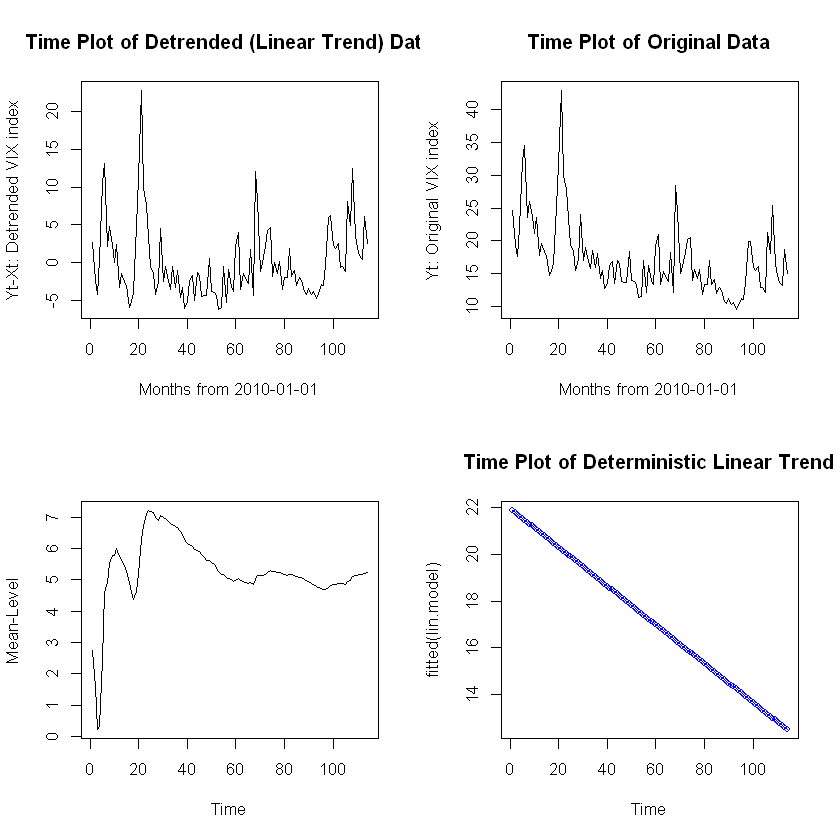

In [1084]:
# Time Plot of Detrended (Linear Trend) Data
par(mfrow=c(2,2))
lin.detrend <- VIXvalue-fitted(lin.model)
plot.ts(lin.detrend, main="Time Plot of Detrended (Linear Trend) Data", xlab="Months from 2010-01-01", ylab="Yt-Xt: Detrended VIX index")
plot.ts(train, main ="Time Plot of Original Data", xlab="Months from 2010-01-01", ylab="Yt: Original VIX index")

# Mean-Level Plot of Detrended (Linear Trend) Data 
cummean.lin_detrend <- cumsum(lin.detrend/seq_along(lin.detrend))
plot(cummean.lin_detrend, type='l', xlab='Time', ylab='Mean-Level')

# Deterministic Linear Trend Model
plot(fitted(lin.model), main="Time Plot of Deterministic Linear Trend", col="blue", type='o')

### <span style='font-family:Garamond'> ACF Plot and PACF Plot of the Detrended (Linear Trend) Data

<span style='font-family:Garamond'>
<font size=4>
The ACF plot of the detrended (linear trend) data shows a feature of stationary time series. The ACF plot has their sample ACF values after the lag value $k=2$ insignificant, by lying all inside the thresholds of the blue-bands and go to zero for the very high lag values. The PACF plot has its sample PACF value significant only upto the lag value of $k=1$, and also converges to zero as the lag value increases. Since the ACF plot tails off and the PACF plot cuts off at lag $p=k=1$, we can say that this detrended (linear trend) model has an $AR(1)$ signature.

numeric(0)

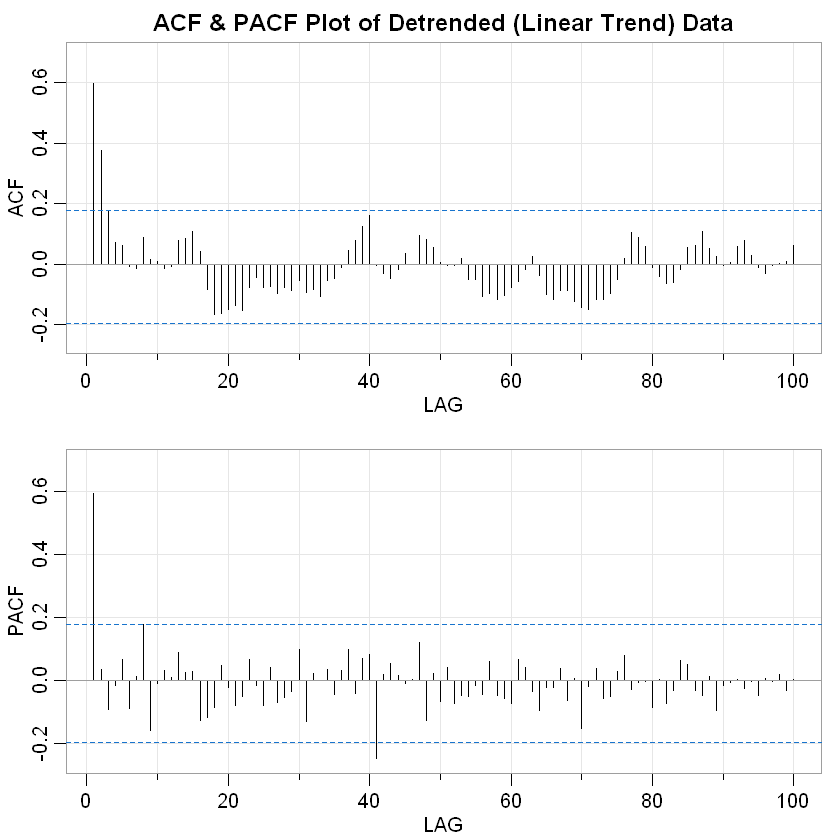

In [757]:
astsa::acf2(lin.detrend, main="ACF & PACF Plot of Detrended (Linear Trend) Data",max.lag=100)[0]

### <span style='font-family:Garamond'> ADF Unit Root Test and KPSS Stationary Test of Detrended (Linear Trend) Data

<span style='font-family:Garamond'>
<font size=4>
By running ADF unit root test and KPSS stationarity test unde assumptions of level stationarity and trend stationarity, the ADF unit root test rejected the null hypothesis of non-stationarity of the time series at 5% significance level as p-value: $0.0385 \lt 0.05$. Also, the KPSS test under the level-stationarity null hypothesis is failed to rejected at 5% significance level as p-value: $0.1 \gt 0.05$, where as the KPSS test under the trend-stationarity null hypothesis is rejected at 5% significance level as p-value: $0.03419 \lt 0.05$. We notice that there is no contradictory results from these tests and we can assume that this detrended (linear trend) model is stationary at the 5% significance level.

In [758]:
adf.test(VIXvalue-fitted(lin.model), alternative='stationary')$p.value
kpss.test(VIXvalue-fitted(lin.model), null="Level")$p.value
kpss.test(VIXvalue-fitted(lin.model), null="Trend")$p.value


	Augmented Dickey-Fuller Test

data:  VIXvalue - fitted(lin.model)
Dickey-Fuller = -3.5757, Lag order = 4, p-value = 0.03856
alternative hypothesis: stationary


Warning message in kpss.test(VIXvalue - fitted(lin.model), null = "Level"):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  VIXvalue - fitted(lin.model)
KPSS Level = 0.16498, Truncation lag parameter = 4, p-value = 0.1



	KPSS Test for Trend Stationarity

data:  VIXvalue - fitted(lin.model)
KPSS Trend = 0.16498, Truncation lag parameter = 4, p-value = 0.03419


### <span style='font-family:Garamond'> Residual Plot of the Fitted Values from the Linear Trend Model

<span style='font-family:Garamond'>
<font size=4>
However, here is one obstacle that we have not checked yet. When we get to fit the model based on the assumptions of deterministic model detrending based on linear regressions, we have to examine the residuals by visualizing over a residual plot to check the randomness of the behaviour of the residuals. This is important because we have to ensure this trend truly represents the deterministic nature of time-series process but not simply an artifact of randomness of that realization of the process as in the Random Walk example mentioned above. The residual plot somewhat plays around the mean of zero, however the variance does not seem equal over the time. We can interpret this case as when we detrend the model, a wrong choice of deterministic trend model made the rest stochastic trend $X_{t}$ not actually a random and probablistic component. Therefore, we cannot use a linear trend model for the detrending of our original time series.

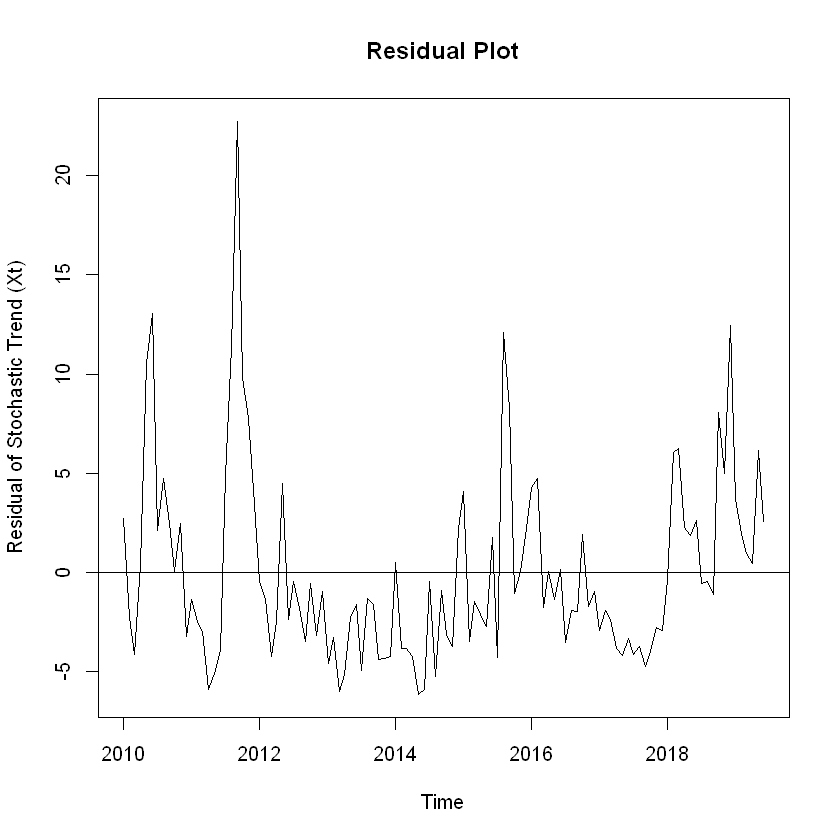

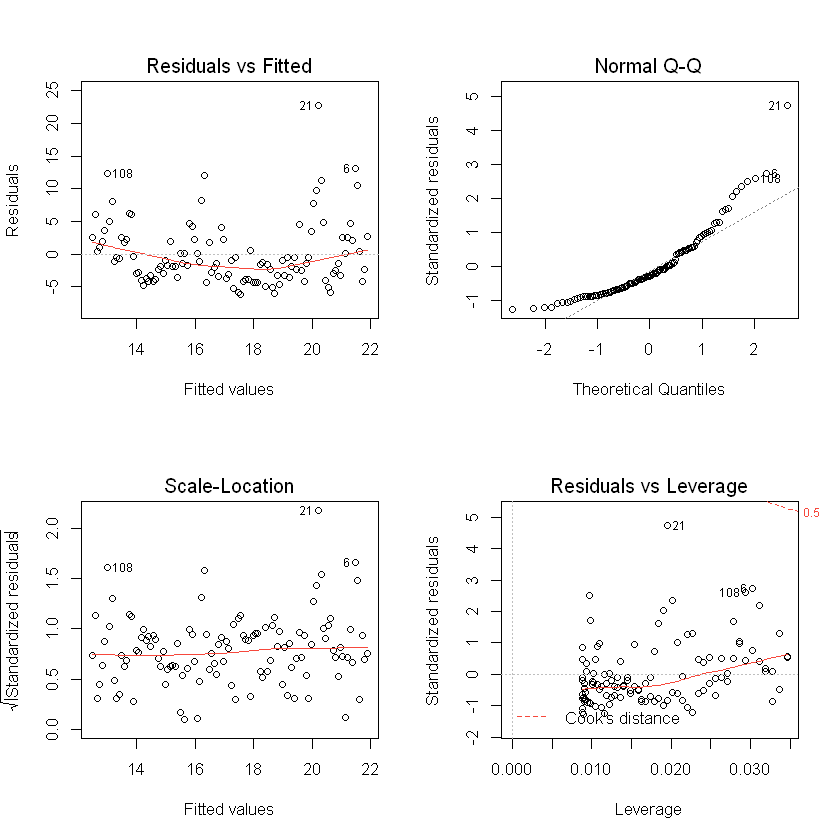

In [1085]:
# Residual Plot of Linear Trend Model for Random Behaviour Check of Stochastic Tren
plot(type="l",time(train), resid(lin.model), na.action=NULL, 
     xlab='Time', ylab='Residual of Stochastic Trend (Xt)', main="Residual Plot")
abline(0,0)
par(mfrow=c(2,2))
plot(lin.model)

## <span style='font-family:Garamond'> Method 3.2.(B): Quadratic Regression (Quadratic Trend)

<span style='font-family:Garamond'>
<font size=4>
    
A quadratic trend takes a form of $\mu_{t} = \beta_{0} + \beta_{1}t + \beta_{2}t^{2}$ as a form of Quadratic Regression Model. Same as we did above, We fit the `lm()` function is used to fit the monthly VIX index data as the response variable and the time recorded the corresponding VIX index data (every month) as the first explanatory variable. The second explanatory variable is the squared of the time variable. The summary of the linear model we fit still displays that our beta values are significant, however, even if we look at the $R^{2}_{Mult.}$ for the higher order of explanatory variables, there is no improve of the explanation power and the value is very low. Therefore, we will also not choose to assume our deterministic trend as a quadratic trend.

In [760]:
# Multiple Linear Detrended (Quadratic Trend) Data
train.ts <- ts(train.df)
DATEvalue <- train.df$Date
VIXvalue <- train.ts[,2]
quad.model <- lm(VIXvalue ~ time(train.ts) + I(time(train.ts)^2), na.action=NULL)
summary(quad.model)


Call:
lm(formula = VIXvalue ~ time(train.ts) + I(time(train.ts)^2), 
    na.action = NULL)

Residuals:
   Min     1Q Median     3Q    Max 
-7.386 -2.732 -1.011  1.318 22.310 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         25.8061672  1.3076063  19.735  < 2e-16 ***
time(train.ts)      -0.2818306  0.0524898  -5.369 4.39e-07 ***
I(time(train.ts)^2)  0.0017287  0.0004422   3.909  0.00016 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.572 on 111 degrees of freedom
Multiple R-squared:  0.3353,	Adjusted R-squared:  0.3233 
F-statistic:    28 on 2 and 111 DF,  p-value: 1.43e-10


### <span style='font-family:Garamond'> Time Plot of Fitted Values from Quadratic Trend Model

<span style='font-family:Garamond'>
<font size=4>
    
The time plot of the detrended (quadtratic trend) training data has also changed in a way that descending of the overall visualzied trend is removed similar to the time plot of the linear detrended model. The left end of the plot is much more stabilizied as the linear trend model fitting, obviously because we now fitted a curve-shaped deterministic trend model. Also, further investigation is necessary for the detecting of stationarity and usability of this detrended model.

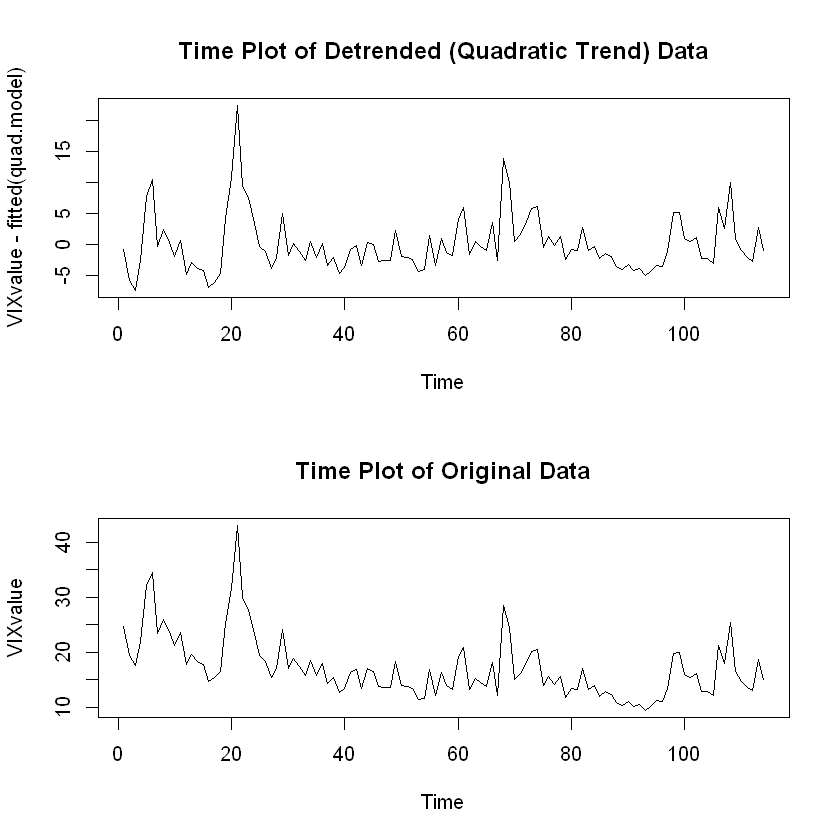

In [761]:
# Time Plot of Detrended (Quadratic Trend) Data
par(mfrow=c(2,1))
quad.detrend <- VIXvalue-fitted(quad.model)
plot.ts(VIXvalue-fitted(quad.model), main="Time Plot of Detrended (Quadratic Trend) Data")
plot.ts(VIXvalue, main = "Time Plot of Original Data")

### <span style='font-family:Garamond'> Mean-Level Plot of the Detrended (Quadratic Trend) Data

<span style='font-family:Garamond'>
<font size=4>
    
The mean-level plot of the detrended (quadratic trend) data shows much less fluctation of cummulative mean compared to the linear trend model case, as the cummulative mean shows a behaviour of converging to some constant value with lessen amplitudes on fluctuating as the time $t$ goes by ($t$ increase).

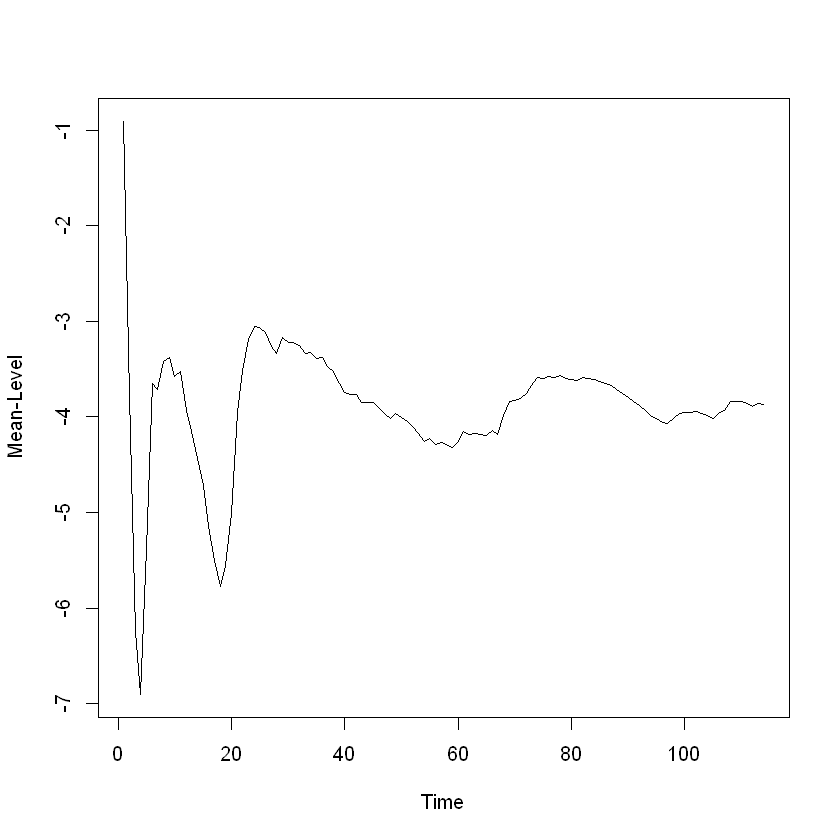

In [762]:
# Mean-Level Plot of Detrended (Quadratic Trend) Data 
cummean.quad_detrend <- cumsum(quad.detrend/seq_along(quad.detrend))
plot.ts(cummean.quad_detrend, type='l', xlab='Time', ylab='Mean-Level')

### <span style='font-family:Garamond'> ACF Plot and PACF Plot of the Detrended (Quadratic Trend) Data

<span style='font-family:Garamond'>
<font size=4>
The ACF plot of the detrended (quadratic trend) data shows less features stationary time series compared to the linear detrended model. The ACF plot tails off at the lag value $k=2$ but there are several significant sample ACF value that crossed the significance blue-banded thresholds near lag value of $k=30$ and $k=40$. The PACF plot shows quite similar behaviours as the linear detrending, but the one significant PACF value near lag value of $k=42$ breaks the cut-off behaviour of the PACF plot.

numeric(0)

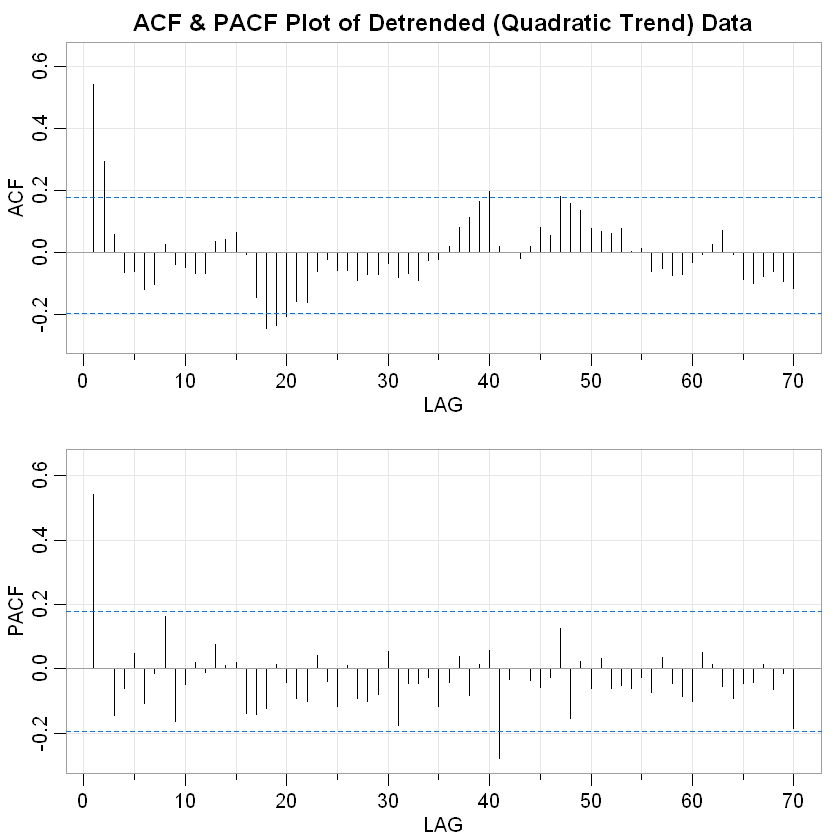

In [824]:
# ACF and PACF Plot of the Detrended (Quadratic Trend) Data
astsa::acf2(quad.detrend, main="ACF & PACF Plot of Detrended (Quadratic Trend) Data",
            max.lag=70)[0]

### <span style='font-family:Garamond'> ADF Unit Root Test and KPSS Stationary Test of Detrended (Quadratic Trend) Data

<span style='font-family:Garamond'>
<font size=4>
By running ADF unit root test and KPSS stationarity test under assumptions of level stationarity and trend stationarity, the ADF unit root test rejected the null hypothesis of non-stationarity of the time series at 5% significance level as p-value: $0.01\lt 0.05$. Both KPSS tests under the level-stationarity and trend-stationarity null hypotheses has failed to rejected at 5% significance level as p-value: $0.1 \gt 0.05$. We notice that there is no contradictory results from these tests and we can assume that this detrended (linear trend) model is stationary at the 5% significance level. We may consider the detrended time series as a stationary time series, however, we still have to doubt its usability by testing the residual of the model we fitted this quadratic deterministic trend.

In [764]:
adf.test(quad.detrend, alternative='stationary')$p.value
kpss.test(quad.detrend, null="Level")$p.value
kpss.test(quad.detrend, null="Trend")$p.value

Warning message in adf.test(quad.detrend, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  quad.detrend
Dickey-Fuller = -4.0922, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in kpss.test(quad.detrend, null = "Level"):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  quad.detrend
KPSS Level = 0.047725, Truncation lag parameter = 4, p-value = 0.1


Warning message in kpss.test(quad.detrend, null = "Trend"):
"p-value greater than printed p-value"



	KPSS Test for Trend Stationarity

data:  quad.detrend
KPSS Trend = 0.047725, Truncation lag parameter = 4, p-value = 0.1


### <span style='font-family:Garamond'> Residual Plot of the Fitted Values from the Quadratic Model

<span style='font-family:Garamond'>
<font size=4>
The residual plot of the fitted values, also same as the stochastic trend $X_{t}$ that it supposed to be in the formula mentioned above, doesn't show equal variance. Therefore, we know that detrending the original time series using both linear and quadratic deterministic trend would not work, since both cases do not have their residual behaving as a random stochastic trend.

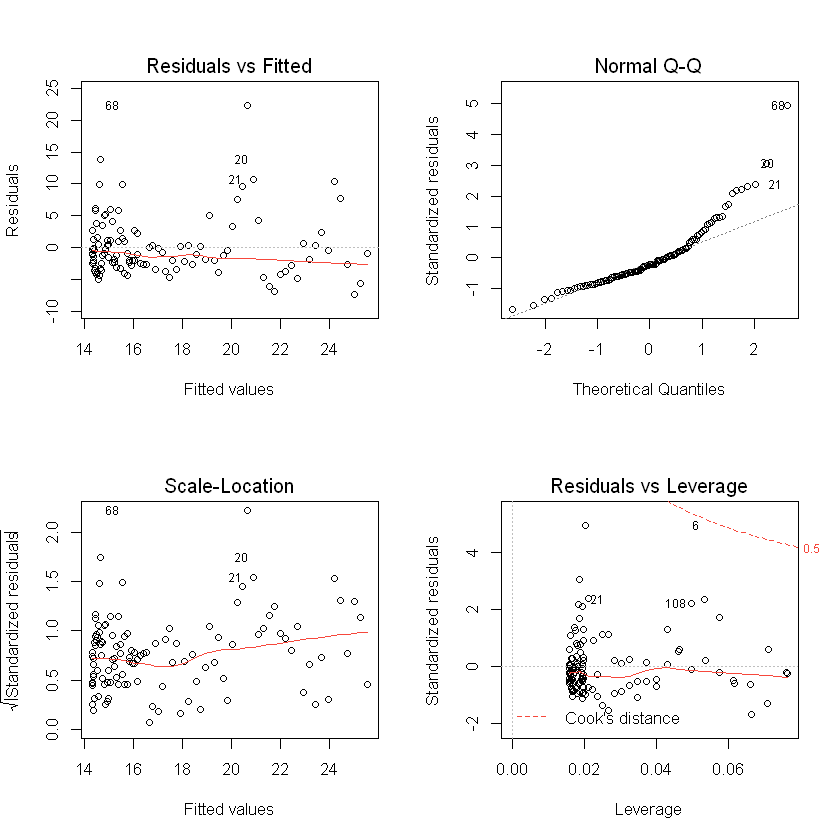

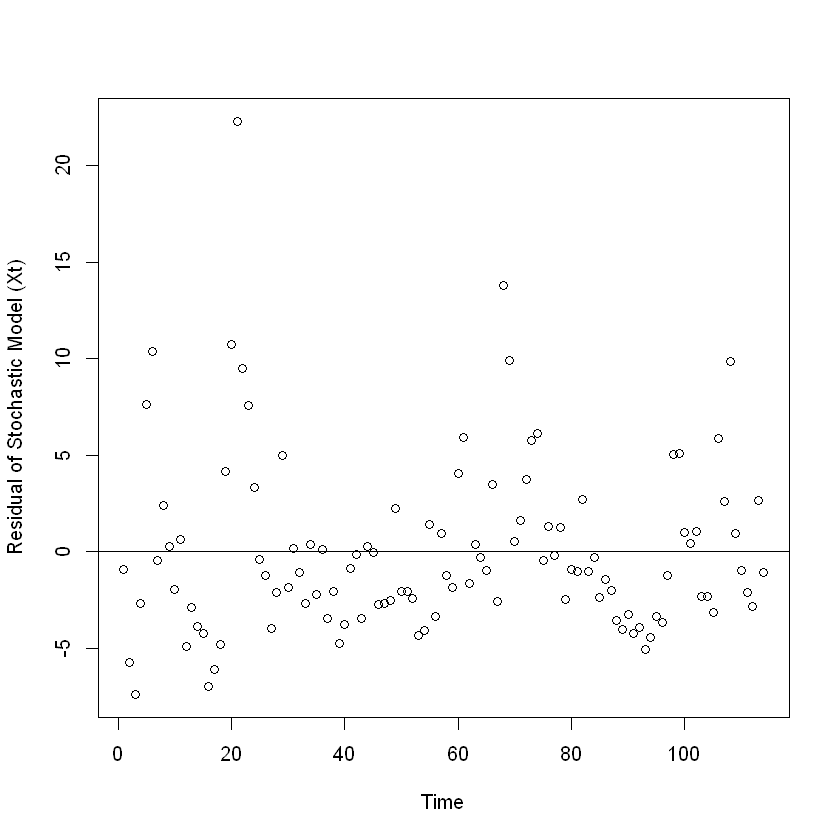

In [765]:
# Residual Plot of Linear Trend Model for Random Behaviour Check of Stochastic Trend
plot <- {par(mfrow=c(2,2))
plot(quad.fit)}

par(mfrow=c(1,1))
plot(time(train.df[,2][[1]]), resid(quad.fit), xlab='Time', ylab="Residual of Stochastic Model (Xt)", na.action=NULL)
abline(0,0)

## <span style='font-family:Garamond'> Method 3.2.(C): Cosine Trend

<span style='font-family:Garamond'>
<font size=4>
    
We now take an different attempt of fitting a cosine trend, using harmonic regression. The model is asummed that the average VIX index value across the time exhibits in a period behaviour, in a form of $\mu_{t} = \beta cos(2\pi ft + \phi)$ where $\beta$: amplitude, $f$: frequency (a reciproal of period), $\phi$: phase. To fit, we can consider a transformation of the average VIX index, and in a final form, we can express it as a linear regression model with an intercept as $\mu_{t} = \beta_{0} + \beta_{1}cos(2\pi ft) + \beta_{2}sin(2\pi ft)$. Here, for the frequency parameter of cosine trend model fitting, we chose frequency=12 since the data given is a monthly recorded data, every 1st day of the month. By looking at the summary function of the cosine trend model we fitted, it has extremely low $R^{2}$ which means the explanation of power is not strong enough with the insignificant harmonic regression coefficents as well. 

### <span style='font-family:Garamond'> Fitting a Cosine Trend Model Using Harmonic Regression

In [1035]:
# Cosine Trend Fitting with Frequency 12 months
VIXindex <- ts(regime6$VIX, start=c(2010,1),
               end=c(2019,12), frequency=12)

cos.train <- window(VIXindex, start=c(2010,1), end=c(2019,6))
cos.test <- window(VIXindex, start=c(2019,7), end=c(2019,12))

har <- harmonic(train_cosine,1)
cos.model <- lm(cos.train~har)
summary(cos.model)

data.cos <- cos.model$fitted.values
cos.noise <- cos.train-data.cos


Call:
lm(formula = cos.train ~ har)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9585 -3.5520 -0.8453  2.3472 24.4915 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     17.2323     0.5186  33.228   <2e-16 ***
harcos(2*pi*t)  -0.2743     0.7326  -0.374   0.7089    
harsin(2*pi*t)  -1.2691     0.7334  -1.730   0.0863 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.531 on 111 degrees of freedom
Multiple R-squared:  0.02746,	Adjusted R-squared:  0.009935 
F-statistic: 1.567 on 2 and 111 DF,  p-value: 0.2133


### <span style='font-family:Garamond'> Time Plot of Cosine Trend Model and Detection of the Catch of Train Datapoints

<span style='font-family:Garamond'>
<font size=4>
    
Also, by looking at the plot of fitted value and the original datapoints to see how the cosine trend model catches the original time series data. These two visualzation results suggest us to have a doubt on fitting a cosine trend model as a deterministic trend in our VIX index data would actually give an enoughly stochastic trend not random enough for the proper detrending of the data. 

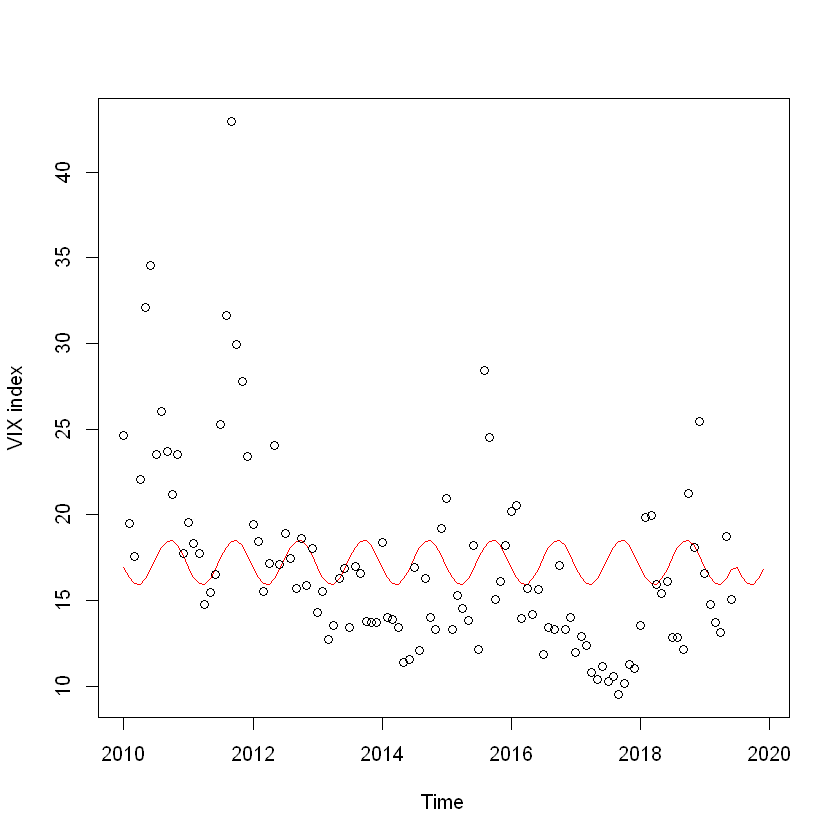

In [1040]:
# Time Plot of Cosine Trened Model and Points from the Original Series
plot(ts(data.cos, start=c(2010,1), end=c(2019,12), freq=12), ylab="VIX index", type="l", col="red",
     ylim=range(c(data.cos, cos.train))); points(cos.train)

### <span style='font-family:Garamond'> Time Plot and Mean-Level Plot of Detrended (Cosine Trend) Train Data

<span style='font-family:Garamond'>
<font size=4>
Also, from the time plot of the detrended (cosine trend) train data, we can clearly see that the detrending did not "detrend" the original time series enough to be stationarity, hence a random residuals as a stochastic trend component. The mean-level plot behaviour is almost nothing different to the mean-level plot of original train VIX index data discussed from the Section $3.1.1$.

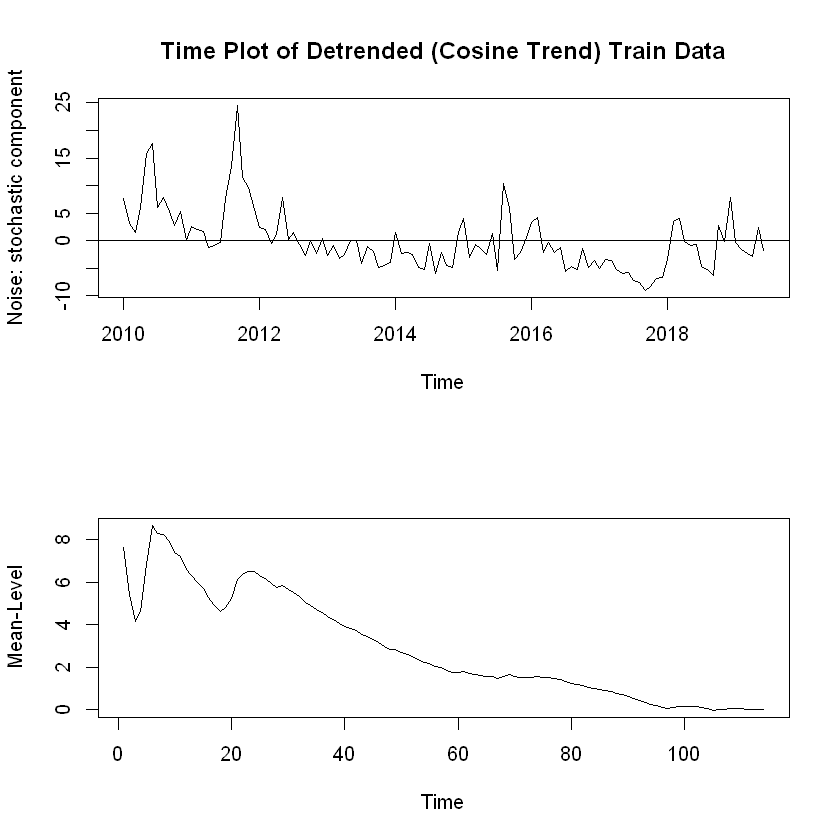

In [1086]:
par(mfrow=c(2,1))
# Detrending from the Cosine Model 
cos.noise <- cos.train-data.cos
plot.ts(cos.noise, ylab="Noise: stochastic component", 
        main="Time Plot of Detrended (Cosine Trend) Train Data")
abline(h=0)

# Mean-Level Plot of Detrended Cosine Model
cummean.cos.noise<- cumsum(cos.noise)/seq_along(cos.noise)
plot(cummean.cos.noise, type='l', xlab='Time', ylab='Mean-Level')

### <span style='font-family:Garamond'> ACF and PACF Plot of Detrended (Cosine Trend) Train Data

<span style='font-family:Garamond'>
<font size=4>
As we expected, the acf plot shows tailing off with fairly fast decay, but then shows few significant sample ACF values at lag values around $k=6+12=18$, whereas the PACF plot, now shows a clear cut off at lag value $k=1$. 

numeric(0)

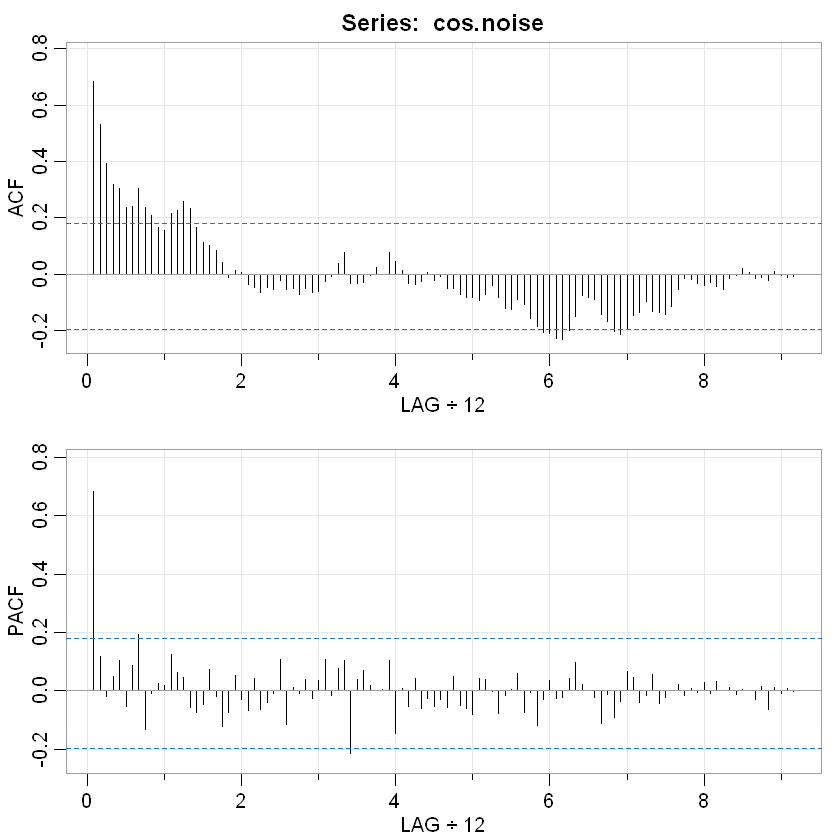

In [829]:
acf2(cos.noise, max.lag=110)[0]

ACF tails off to zero with exponential decay and PACF cuts off at $k=3$, hence it would be reasonable to choose $AR(3)$ ($ARMA$($0,0$)) since we can make a use of our stationarity assumed by running ADF test and KPSS test. 

### <span style='font-family:Garamond'> ADF Unit Root Test and KPSS Stationary Test of Detrended (Cosine Trend) Train Data

<span style='font-family:Garamond'> 
<font size=4>
The ADF unit root test under stationarity of the process at 5% significance level failed to reject the null hypothesis of non-stationarity since the p-value: $0.0549 \gt 0.05$. Also both KPSS tests under level stationarity and trend stationarity null hypotheses are rejected at 5% significance level since the p-value: $0.01 \lt 0.05$ and $0.02283 \lt 0.05$. With the visualzied clues above and the failure to accept the stationarity assumption from both tests we do not see stationarity, thus usability of this detrended (using cosine trend) model for our forecast model building.

In [833]:
# ADF Unit Root Test and KPSS Stationary Test of Detrended (Cosine Trend) Train Data
adf.test(cos.noise)$p.value
kpss.test(cos.noise, null="Level")$p.value
kpss.test(cos.noise, null="Trend")$p.value


	Augmented Dickey-Fuller Test

data:  cos.noise
Dickey-Fuller = -3.4189, Lag order = 4, p-value = 0.0549
alternative hypothesis: stationary


Warning message in kpss.test(cos.noise, null = "Level"):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  cos.noise
KPSS Level = 1.0238, Truncation lag parameter = 4, p-value = 0.01



	KPSS Test for Trend Stationarity

data:  cos.noise
KPSS Trend = 0.18178, Truncation lag parameter = 4, p-value = 0.02283


<span style='font-family:Garamond'>
<font size=4>
Unlike to fitting a certain specific deterministic trend model for the transformation into a stationary process, there are also mathematical transformation methods, and the log-transformation is one of the covenient way to ease-off the inconsistent fluctations the time series data that has some remarkable descending or ascending trend. 

## <span style='font-family:Garamond'> Method 3.2.(D) Log-transformation and Simple Differencing 

<font size=4>
<span style='font-family:Garamond'>
Other than than detrending the original time series model by modelling a specific form of deterministic trend, we have mathematical transformation methods such as natural-logarithm transformation, Box-Cox Power, Percentage Changes etc. and differencing methods such as simple differencing, seasonal differencing, and fractional differencing (Cryer & Chan, 2008). Among those, we are going to make an attempt to use the convenient ones: natural-logarithm transformation and simple differencing. 

### <span style='font-family:Garamond'> Log-transformation of the Data

In [1023]:
# Log-transformation of the Original Data
train_VIX <- ts(train.df[,2], start=c(2010,1), end=c(2019,12), freq=12) 
train_VIX.log <- log(train_VIX)

### <span style='font-family:Garamond'> Time Plots and Mean-Level Plots of Log-transformed Data vs. Time Plot of Original Data

<span style='font-family:Garamond'> 
<font size=4>
    
Comparing the time plot of each original monthly VIX index data and log-transformed monthly VIX index data, we may not detect a significant change made just by applying a logarthim on the data. However, when we have a closer look on each time plot between 2012 and 2019, we can see that the log-transformation has lessen decent the fluctuations, that is to say improved its homoscedacity. Speficially, the hollowed area with lower VIX index has lifted up closer to the major spikes of VIX index such as the peak from late 2011. Intuitively, we can expect, when we take the simple difference of this log-transformed data, we are going to observed the level "adjustments" of the hollowed areas and spikes will contribute to the stationarity of the transformed data at the end.

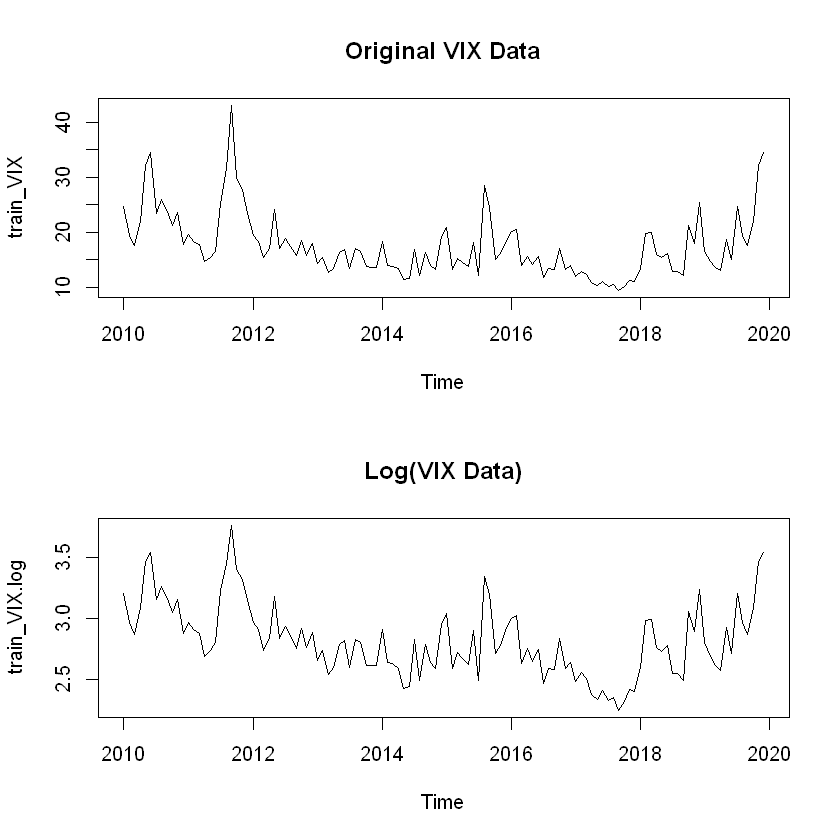

In [1047]:
# Time Plot of Original VIX Data vs. Time Plot of Log(VIX Data)
par(mfrow=c(2,1))
plot(train_VIX, main="Original VIX Data")
plot(train_VIX.log, main="Log(VIX Data)")

<span style='font-family:Garamond'> 
<font size=4>

Comparing differencing the original data and differencing the log-transformed original data, we can notice that the "leveling down" of log-transformation contributed to the homoscedacity of the transformed data improved the homoscedacity of the simple differenced transformed data. In addition, it also a slight ascending trend that pertains in the `train_VIX.d1` data, is also adjusted down in the `train_VIX.log.d1`. Meanwhile, there is not significant difference between the mean-level plots from each data. Both of data has their mean-level plot with little to none fluctuations and converges to a single constant value across the time $t$. To validate whether if the improvment visualized, the behaviour of ACF and PACF plots for each transformed data should be examined.

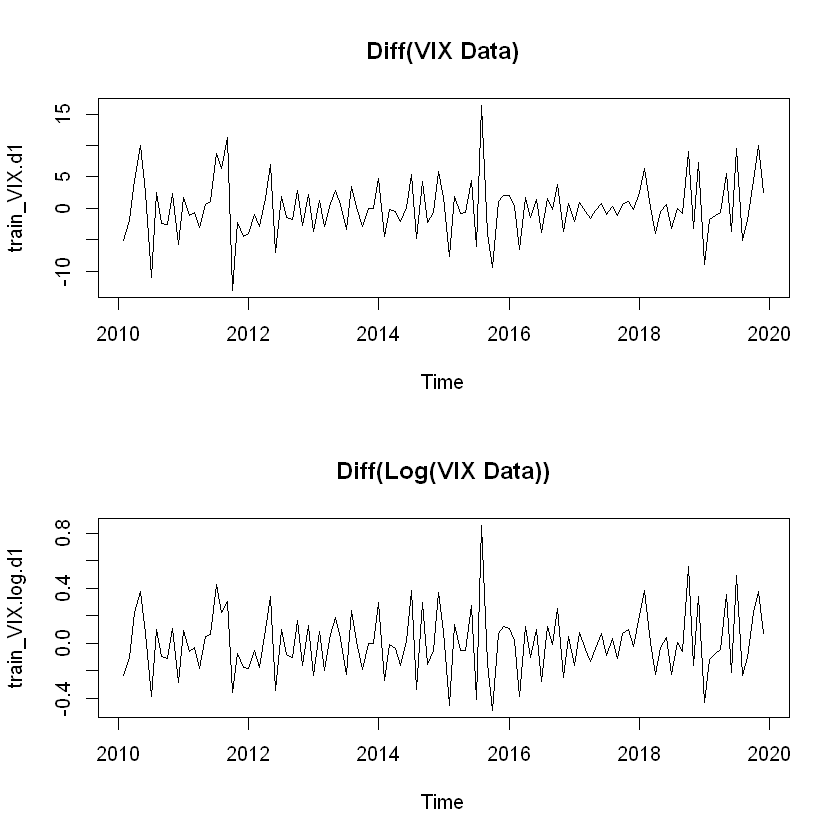

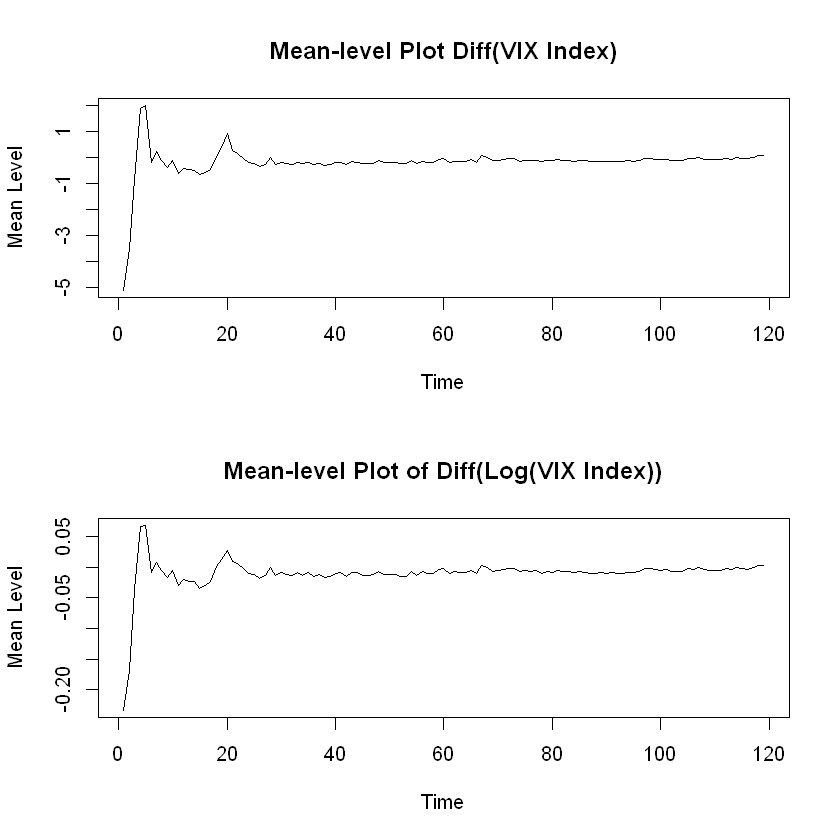

In [1088]:
# Time Plot of Diff(VIX_Data) vs. Diff(Log(VIX Data))
train_VIX.d1 <- diff(train_VIX)
train_VIX.log.d1 <- diff(train_VIX.log)
par(mfrow=c(2,1))
plot(train_VIX.d1, main="Diff(VIX Data)")
plot(train_VIX.log.d1, main="Diff(Log(VIX Data))")

# Mean-Level Plot of Diff(VIX_Data) vs. Diff(Log(VIX Data))
par(mfrow=c(2,1))
cummeantrain_VIX.d1 <- cumsum(train_VIX.d1) / seq_along(train_VIX.d1)
plot(cummeantrain_VIX.d1, type="l", xlab="Time", ylab="Mean Level", main="Mean-level Plot Diff(VIX Index)")
cummeantrain_VIX.log.d1 <- cumsum(train_VIX.log.d1) / seq_along(train_VIX.log.d1)
plot(cummeantrain_VIX.log.d1, type="l", xlab="Time", ylab="Mean Level", main="Mean-level Plot of Diff(Log(VIX Index))")

### <span style='font-family:Garamond'> ACF and PACF Plots of Simple Differenced Log-transformed Data vs. Simple Differenced Original Data

<span style='font-family:Garamond'>
<font size=4>

Comparing the ACF and PACF plots of ```train_VIX.d1``` and ```train_VIX.log.d1```, the ACF plot of the data simple differenced the original time series somehow showed clear cut off at lag $k=1$ but then a significant value shows at lag $k=47$. This might be negligible as we see the sample ACF shows its behaviour converging to zero cross the higher lag values. The PACF plot here, has a clear cut at the first lag $k=1$ and the rest of the insignificant sample ACF values fall inside of the thresholds of the blue-bands, decay and converge to zero across the higher lag values. This transformed times series is expected to be a stationary process by the visualizations so far, but we will also see whether if the simple differenced log-transformed data shows much more stationarity on its ACF and PACF plots.

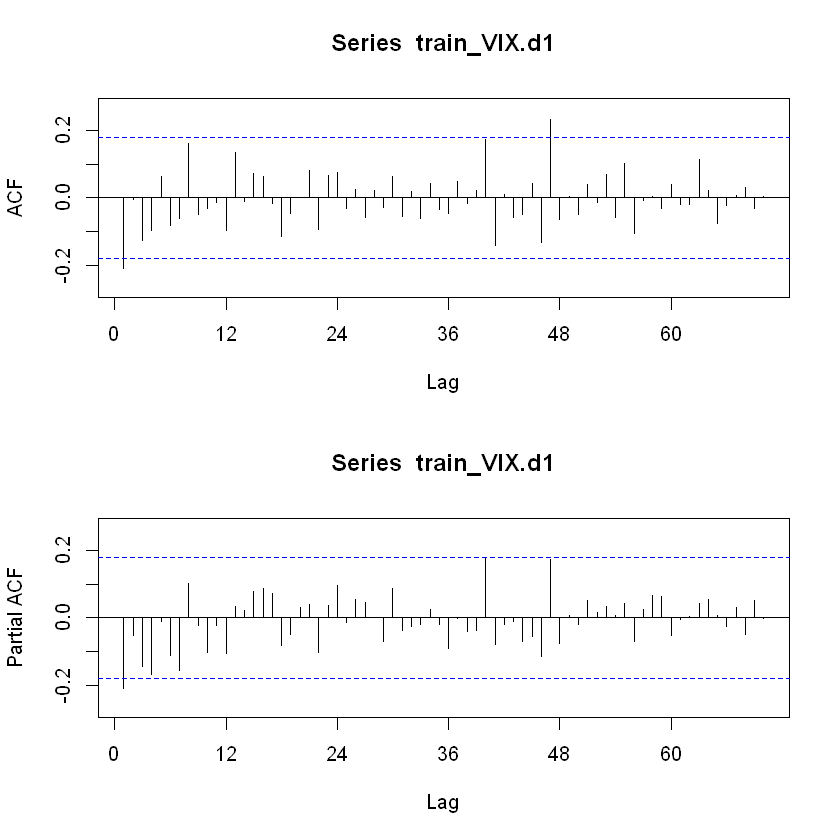

In [1146]:
# ACF and PACF Plot of Diff(VIX Data)
par(mfrow=c(2,1))
forecast::Acf(train_VIX.d1, lag=70)
forecast::Pacf(train_VIX.d1, lag=70)

<span style='font-family:Garamond'>
<font size=4>

The ACF plot of this data, simple differenced log-transformed data, also has a clear cut-off right at lag $k=1$, and other sample ACF values followed by completely lies inside of the thresholds of blue-bands without any exceptions of significant sample ACFs at higher lag values. The PACF plot display almost same behaviour as the previous PACF plot but the current one shows more stabilized and all the other sample PACF values stay in the insignificance thresholds, and eventually decay to zero across the higher lag values. Thus, these ACF and PACF plots would support the stationarity.  

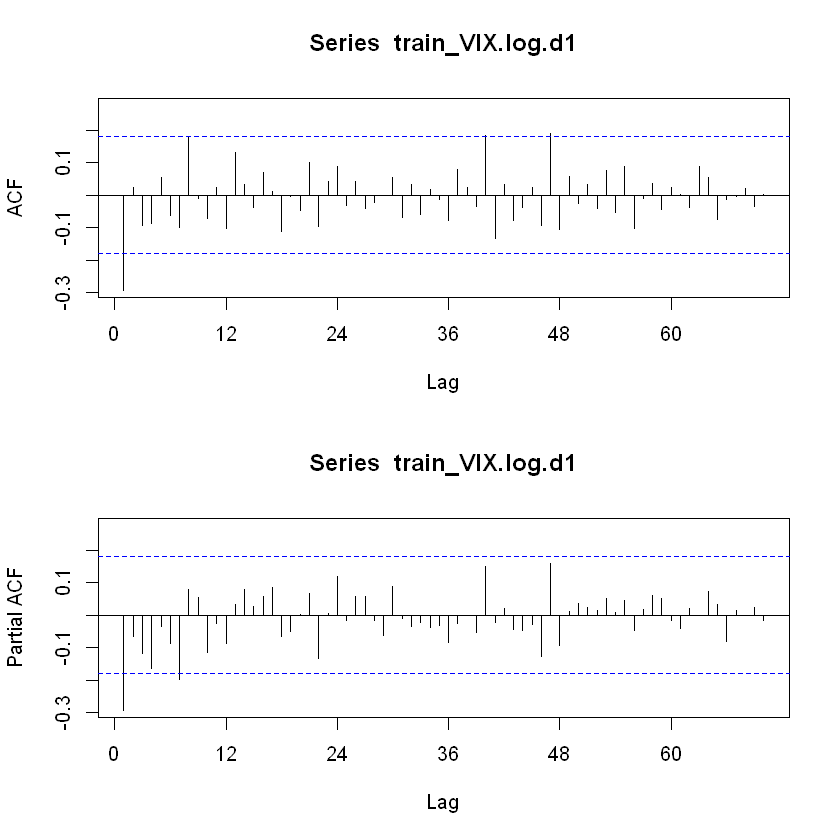

In [1267]:
# ACF and PACF Plot of Diff(Log(VIX Data))
par(mfrow=c(2,1))
forecast::Acf(train_VIX.log.d1, lag=70)
forecast::Pacf(train_VIX.log.d1, lag=70)

### <span style='font-family:Garamond'> ACF Unit Root Test and KPSS Stationary Test for ```train_VIX.d1``` and ```train_VIX.log.d1```

<span style='font-family:Garamond'>
<font size=4>
    
Both ADF and KPSS for the stationarity is assumed to be significant as the p-value for ADF test were both $0.01 \lt 0.05$ and KPSS test under level stationarity and trend stationarity had p-value $0.1 \gt 0.05$ at 5% significance level, that is, both transformation data are stationarity. However, here is a concern about detecting AR/MA signature according to the Box-Jenkins method. After testing the stationarity of the transformed time series data, we get to observe and see between which term (autoregressive or moving average) has the dominant signature over the time series data. From the ACF plot of the original time series, the series had a strong AR signature as it tailed off and for the PACF plot, it had a cut-off at $k=1=p$, hence an AR($1$) signature only if the original series was stationary enough to fit ARMA($1$, $q$). We acquired a transformed stationary series but the behaviours of its ACF and PACF plots did not fall into any criteria of the theoretical signature identificiation table as both of the plots had a cut-off at a certain lag. The decision here is to first consdier ARMA($1$, $1$) because of the ACF and PACF plots of the transformed model had a cut-off at the same lag value $k=1$, hence we assume the following process has AR($1$) and MA($1$) property, simulataneously. Since the stationarity of this transform that is considered significant, we are going to examine the extended ACF plot for the model order-parameter selection.

In [1205]:
# ADF Test of 1-time Differenced Log-transformed Time Series Train Data
adf.test(train_VIX.log.d1, alternative="stationary")$p.value

# KPSS Test of 1-time Differenced Log-transformed Time Series Train Data
tseries::kpss.test(train_VIX.log.d1, null = "Level")$p.value
tseries::kpss.test(train_VIX.log.d1, null = "Trend")$p.value

Warning message in adf.test(train_VIX.log.d1, alternative = "stationary"):
"p-value smaller than printed p-value"


[1] 0.01

Warning message in tseries::kpss.test(train_VIX.log.d1, null = "Level"):
"p-value greater than printed p-value"


[1] 0.1

Warning message in tseries::kpss.test(train_VIX.log.d1, null = "Trend"):
"p-value greater than printed p-value"


[1] 0.1

In [1206]:
# ACF Test of 1-time Differenced Time Series Train Data
adf.test(train_VIX.log.d1, alternative="stationary")$p.value

# KPSS Test of 1-time Differenced Time Series Train Data
tseries::kpss.test(train_VIX.d1, null = "Level")$p.value
tseries::kpss.test(train_VIX.d1, null = "Trend")$p.value

Warning message in adf.test(train_VIX.log.d1, alternative = "stationary"):
"p-value smaller than printed p-value"


[1] 0.01

Warning message in tseries::kpss.test(train_VIX.d1, null = "Level"):
"p-value greater than printed p-value"


[1] 0.1

Warning message in tseries::kpss.test(train_VIX.d1, null = "Trend"):
"p-value greater than printed p-value"


[1] 0.1

## <span style='font-family:Garamond'> 3.3 Candidate Model Selection and Diagnostics

### <span style='font-family:Garamond'> 3.3.1 Extended ACF (EACF)

<font size=4>
<span style='font-family:Garamond'>
An extended ACF (EACF) plot shows which initial ARMA($p$, $q$) should be selected as candidate models. In a form of rows of autogressive order-parameter $p$ and columns of moving average order-parameter $q$, the circled pair of ($p$, $q$) suggests that the candidates with the corresponding circled order-parameter pair are feasible based on the transformed data as an input. For this EACF plot, we can draw an imagery upper-triangular line, horizontally along the MA orders and diagonally along the boundary of feasible pairs and infeasible pairs. Among these combinations of feasible models, an optimal initial order-parameter pair can be set as we look at the apex of the upper-triangular line we drew. In our EACF plot, the initial model is going to be ($p=0$, $q=1$), hence ARMA($0$,$1$).

In [1280]:
# Setting an easier variable name
log.d1 <- train_VIX.log.d1

# Extended ACF (EACF) of the diff(log(VIX)) transformed data
eacf(log.d1, ar.max=5, ma.max=5)

AR/MA
  0 1 2 3 4 5
0 x o o o o o
1 x o o o o o
2 x o o o o o
3 x o x o o o
4 x x x o o o
5 x o x o o o


###  <span style='font-family:Garamond'> 3.3.2 AIC & BIC for Selection of Possible ARMA(p,q) Candidates 

<span style='font-family:Garamond'>
    <font size=4>
        By using AIC and BIC, model selection criteria that applies penality upon the overparameteriziation of the candidate models. The strategy here is to first, sort out the order-parameter pair combinations that fits to the feasible selection grid of the extended ACF plot. Based on our EACF plot, for the model sorted according to AIC, the feasible candidates are:
        
        - AIC: (2,2) (1,4) (4,4) (2,3) (1,5) (2,4) (3,5) (4,5) (3,3) (1,2)
        - BIC: (2,2) (1,2) (2,1) (1,4) (1,3) (2,3) (3,1) (1,5) (2,4) (1,1) (3,3)

Next step is to find the candidate from each criteria, that has the lowest total number of parameters $p+q$ and overparameterize is one order by one order, only if the penalty score is seem to worth the over-parameterization from the current state. From AIC candidates, the candidate with the lowest $p+q$ order is ($1$,$2$). However, at first glance, we can see that AIC penalty scores are almost similar for every candidates sorted by AIC, so we set (1,2) as the best candidate based on AIC. Now, we see the candidates sorted by BIC and can see that ($1$,$1$) has the lowest total parameter $p+q$. From the first step of overparameterizing, either in $p$ or $q$ by order 1, we can see that ($2$,$1$) and ($1$,$2$) both have quite lower BIC score than ($1$,$1$) model, but not anymore significant score improvement by overparameterizing from $p+q=3$. Therefore, following possible candidates would be:
        
        - Possible candidates: (1,1) (1,2) (2,1)

In [1278]:
log.d1.aic <- matrix(0, 5, 5)
log.d1.bic <- matrix(0, 5, 5)

for (i in 0:4) for (j in 0:4){
log.d1.fit <- arima(log.d1, order=c(i, 0, j), method="ML", include.mean =TRUE, optim.control = list(maxit=1000))
log.d1.aic[i+1, j+1] <- log.d1.fit$aic
log.d1.bic[i+1, j+1] <- BIC(log.d1.fit)
} 
log.d1.aic_vec <- sort(unmatrix(log.d1.aic, byrow=FALSE))[1:13]
log.d1.bic_vec <- sort(unmatrix(log.d1.bic, byrow=FALSE))[1:13]

log.d1.aic_vec
log.d1.bic_vec

[[1]]
    r2:c2     r1:c4     r4:c4     r3:c2     r2:c3     r1:c5     r2:c4     r3:c5 
-27.48157 -27.19509 -26.68642 -26.30006 -26.03999 -25.74491 -25.60861 -25.47215 
    r4:c2     r4:c5     r5:c4     r3:c3     r1:c2 
-25.31352 -24.68806 -24.68798 -24.68395 -24.68337

r2:c2      r1:c2      r2:c1      r1:c4      r1:c3      r3:c2      r2:c3 
-14.365073 -14.346000 -12.446963 -11.299469 -11.036338 -10.404441 -10.144372 
     r3:c1      r1:c5      r2:c4      r4:c2      r1:c1      r3:c3 
 -8.267085  -7.070173  -6.933864  -6.638779  -6.601951  -6.009205

## <span style='font-family:Garamond'> 3.4 Final Model Decision Among Pools of Candidate Models

<font size=4>
<span style='font-family:Garamond'>
The diagnostics of the candidates models were done on Appendix. For the normality test of the residuals of each candidate model. Although the Q-Q plots of the candidate model seemed to follow normality, they all failed to have any significant evidence supporting their normality since they rejected the null hypothesis of normality from the Shapiro-Wilk's normality test at 5% significance level, that is to say, all of the candidate models selected deal with their innovation that is purely random process, but not following a normality, so cannot be a Gaussian noise. The Ljung-Box tests on every candidate models had their p-values higher than the threshold, not significant enough to reject the null hypothesis of uncorrelated error, that is to say all the candidate models have no issues since they have enough evidence for having uncorrelated errors. We can notice that, however, for the candidate model 1: ARMA($1$, $1$), its Ljung-Box test p-values of are relatively lower than the other two candidate models. Now, the rest of criteria to choose the final model to use for the forecasting would be the standard error of model parameters, harmonic mean of residuals, and their AIC and BIC scores. However, since the differences between these components would not be a remarkable gain, taking account of the increase of total order-parameter of the model $p + q$. The optimal decision is to choose the model with the lowest total order-parameters $p + q$ because of the principle of parsimony (Cryer & Chan, 2008). Thus, the final model that we are going to employ is going to be ARMA($1$, $1$), hence ARIMA($1$, $d=1$, $1$) will be used for the forecasting of the test data.

## <span style='font-family:Garamond'> 4. Forecasting: ARIMA(1, 1, 1)

<font size=4>
<span style='font-family:Garamond'>
(Introduction about forecasting that I'm going to perform)

In [1623]:
# Forecast of Test Data
test.fit <- arima(log.d1, order=c(1, 1, 1))
predictions <- predict(test.fit, length(test))
list.predictions <- predictions$pred[1:length(test)]
list.predictions
list.pred.se <- predictions$se[1:length(predictions)]

# RMSE of Test Data
RMSE.test <- sqrt(sum(test.fit$residuals^2) / length(test.fit$residuals))
sprintf("The Root Mean Squared Error of the test data is %s.", RMSE.test)

# Harmonic Mean of Test Data
Har.test <-  length(test.fit$residuals)/sum(1/abs(test.fit$residuals))
sprintf("The Harmonic Mean of the test data is %s.", Har.test)


# Predicted Values
vix.forecast.value <- exp(X)
vix.forecast <- xts(vix.forecast, as.Date(test.df[,1][[1]]))
data.frame(vix.forecast)
vix.test <- xts(test.df[,2], as.Date(test.df[,1][[1]]))
data.frame(vix.test)

[1] -0.017194640  0.008982785  0.001484759  0.003632426  0.003017267
[6]  0.003193468

[1] "The Root Mean Squared Error of the test data is 0.216142475584101."

[1] "The Harmonic Mean of the test data is 0.0157432335609335."

,x
,<dbl>
2019-07-01,20.08554
2019-08-01,16.41840
2019-09-01,14.89265
2019-10-01,14.20663
2019-11-01,13.88677
2019-12-01,13.73532


,VIX
,<dbl>
2019-07-01,16.12
2019-08-01,18.98
2019-09-01,16.24
2019-10-01,13.22
2019-11-01,12.62
2019-12-01,13.78


<font size=4>
<span style='font-family:Garamond'>
(Interpretation)

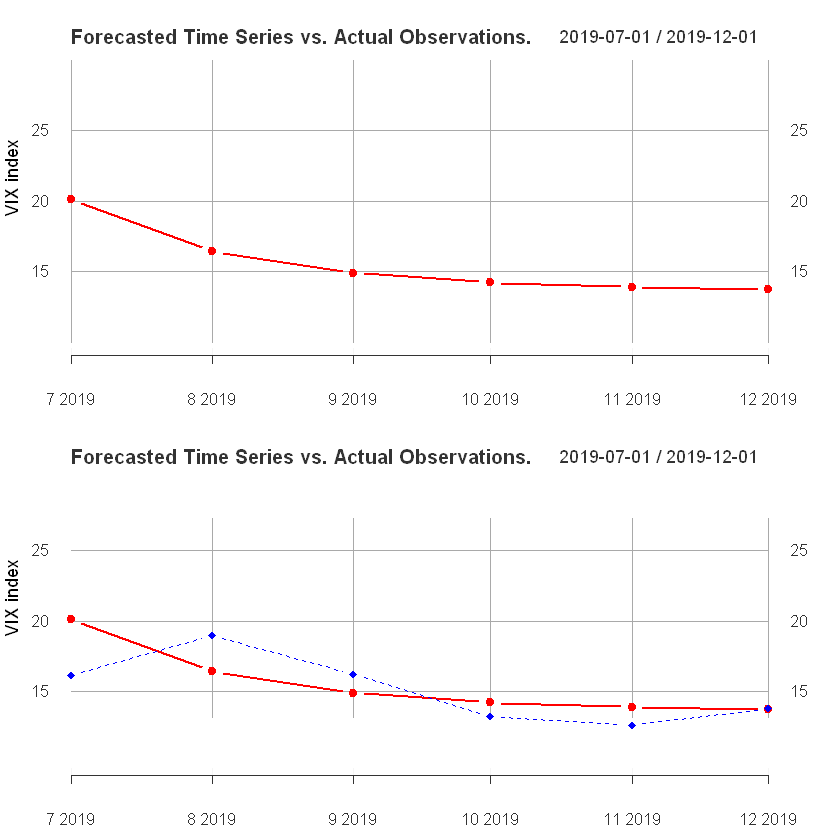

In [1641]:
# Forecasted value vs. test data plot
par(mfrow=c(2,1))
plot(vix.forecast, type="b", pch=19, col="red", xlab="Time", ylab="VIX index" , ylim=range(10:30), main='Forecasted Time Series vs. Actual Observations.')
lines(vix.test, pch=18, col="blue", type="b", lty=2)

## <span style='font-family:Garamond'> 5. Conclusion, Reflection and Discussion 

<font size=4>
<span style='font-family:Garamond'>
In this time series analysis of monthly VIX index data, we investiaged the conceptual property of the given monthly VIX index data from 1990 January to 2021 December, by considering the inhomogenity of the data, which can be explained by the major financial or any other significant factors that terminate and change the previosuly ongoing behaviour of the trend. The overall data, at first glance, we could notice that the data can be partitioned the entire dataset into several segments, grouping by the shape of the behaviours of the volatitility over a certain period of time, called "Volatility Regimes". By observing the borderlines of each regime and the regime right before one, the "shocks" caused by mostly the major social and economical crises as the driving foreces and with some supports of unknown factors, has tendency to terminate the regime period of the time the crises happen, and then a new regime is created and pertains until another impactful crises strikes. In reference to the examination of this property of the monthly VIX data, we chose to build our time series forecasting model, only considering the data of the sixth regime that is from January 2010 to December 2019. For the validation of our forecasting model performance, we proceeded the model building procedures using the training set, the first 90% of the data in sixth regime, and rest 10% of volatility index data sixth regime is saved for the forecast performance test. 
    
To build our model, the time series data on monthly VIX index is by detecting the presence of nonstationarity as the start of the model specification. For the transformation of the original time series into a stationarity process, we took several difference appproaches of detrending, the removal of deterministic trend of the data to model with the random stochastic component only. We, however, could not find any remarkable deterministic trend model to stationarize our time series data. Since fitting of a trend model in a certain specific form did not performed well, another approach has taken, as a combination of a mathematical transformation and differencing of the data. After several diagnostics, the stationarity of the transformed data of a natural-logarithm and simple differencing showed that it supports our decision to fit an ARMA model based on this transformed data, referring to the Box-Jenkins method. After testing the feasibility of candidate models from the criteria AIC and BIC, that had not much difference between each other on diagnostic results, ARMA(1,1) was chosen according to on the principle of parsimony. On the final stage the test data is predicted with the complete model with its parameters estimated.
    
On the forecasting of the data with the model, the model somehow catched the actual test data, but a concern and curiosity were brought up while building and testing our model. First, notice that the type of the time series we dealt with, pertained so much fluctuations and uncertainity even within a regime, except a bit of descending tendency of the data we could found. Unlike, other time series data that has some significant behaviours in determinstic trend or seasonality, we strictly speaking, failed on the detrending and effective transformations for our model. And upon the research of the newly updated volatility index graph, we see that the very recent time, the VIX rose up spiked high, near the endpoint we built our forecasting model for. Recent studies on the time series of VIX have proposed the deep-learning experiment approaches to forecast the VIX index, however, there was no evident, hence, conclusively result to interpret about the predictability (De Meer, 2020). For our model, we adopted a simple ARMA model building process following a theoretical Box-Jenkins method, that is to say, we see this VIX index data is under much more uncertainity and highly sensitive to the psychological states of the investors on the market. 
    
In conclusion, we reply to what we questioned ourselves above, about the analysis of this VIX data and forecasting. We say that time series models do not always accurately catches the future values for the predictions, and the complexity of building a model to fit time series data that has only few of seasonality and deterministic components but having an extreme heteroscedacity, and specifically like our case, unpredictable in-real-life economical and social crises as sensitive but impactful driving forces of the behaviour of volatility index, that could strike in anytime on the market. An analyis of time series data helps us to prevent us from encountering sudden occassions of crisis or event from future either in close time or in a long term and to prepare it in advance, however, not only by the limits of the current technology that modern human race has, but also most importantly, there would be tiny, but countless of different factors that impacts the uncertaintity of our future from every aspects of our society that are left as unexplanable.   

##  <span style='font-family:Garamond'> 6. Bibliography

<font size=4>
<span style='font-family:Garamond'>
    
- Hyndman, Rob J., and George Athanasopoulos. Forecasting: Principles and Practice. 2nd ed., OTexts, 2021, Forecasting: Principles and Practice, https://otexts.com/fpp2/, Accessed 4 Apr. 2022. 

    
- Insights by Mike Nigro, Insights by Geoff Duncombe, & Insights by Jeffrey N. Saret. (2021, October 06). A machine learning approach to regime modeling. Retrieved April 7, 2022, from https://www.twosigma.com/articles/a-machine-learning-approach-to-regime-modeling
    
    
- Cryer, J. D., &amp; Chan, K. (2008). Time series analysis with application in R. New York City, NY: Springer.
  
    
- De Meer, F. (2020). [Web log post]. Retrieved April 08, 2022, from https://quantdare.com/predicting-the-fall-revisiting-the-forecasting-vix-peaks-experiment/

#  <span style='font-family:Garamond'> 7. Appendix

## <span style='font-family:Garamond'> 7.1 Model Diagonistics

## <span style='font-family:Garamond'> Candidate Model 1: ARMA(1, 1)

### <span style='font-family:Garamond'> (i) Parameter Estimation

In [1315]:
# ARMA(1,1) Parameter Estimation
log.d1_1 <- arima(log.d1, order=c(1,1), method='ML', include.mean=TRUE)
log.d1_1


Call:
arima(x = log.d1, order = c(1, 0, 1), include.mean = TRUE, method = "ML")

Coefficients:
         ar1      ma1  intercept
      0.4843  -0.8429     0.0001
s.e.  0.1383   0.0922     0.0062

sigma^2 estimated as 0.04402:  log likelihood = 16.74,  aic = -27.48

### <span style='font-family:Garamond'> (ii) Test of Normality of Residuals


	Shapiro-Wilk normality test

data:  residuals(log.d1_1)
W = 0.94402, p-value = 8.659e-05


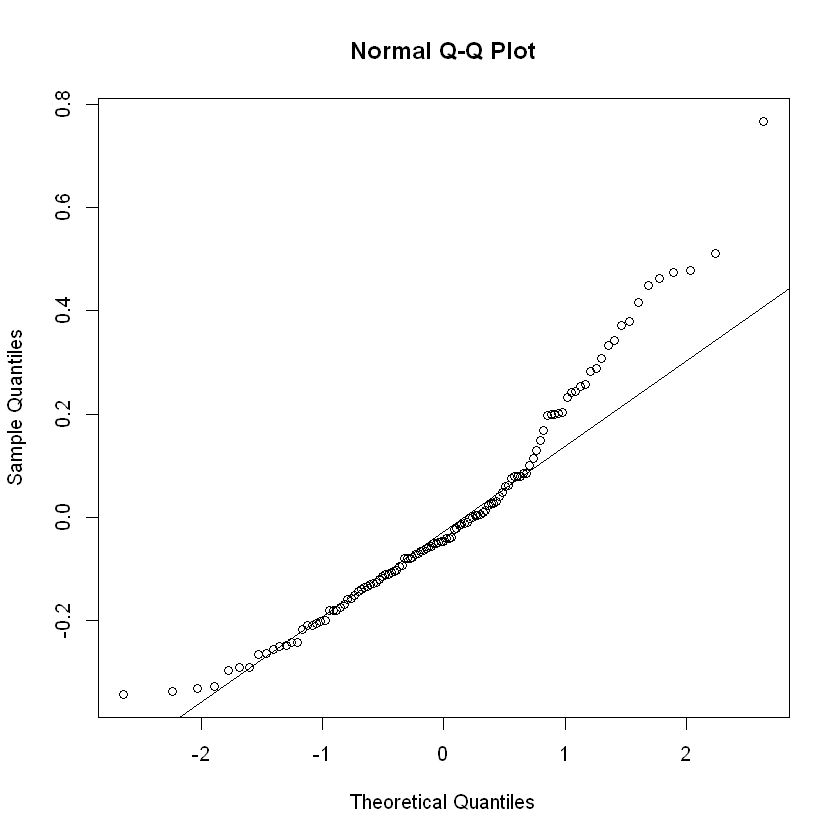

In [1326]:
# Q-Q Plot of ARMA(1,1) 
qqnorm(residuals(log.d1_1))
qqline(residuals(log.d1_1))

# Shapiro-Wilk's Normality Test
shapiro.test(residuals(log.d1_1))

### <span style='font-family:Garamond'> (iii) Test of Uncorrelated Residuals

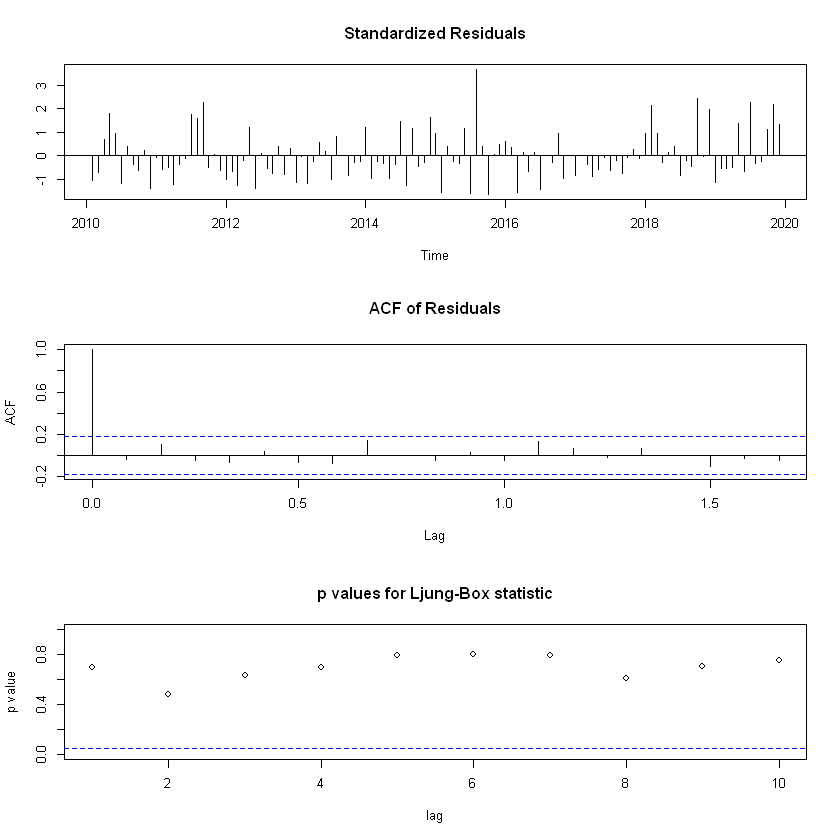

In [1329]:
# Standardized Residuals vs. Time(t) Plot
# ACF of Residual Plot
# Ljung-Box Plots
tsdiag(log.d1_1)

### <span style='font-family:Garamond'> (iv) Harmonic Mean of Residuals

In [1331]:
# Harmonic Mean of Residuals
har.log.d1_1 <- length(log.d1_1$residuals)/sum(1/abs(log.d1_1$residuals))
har.log.d1_1

[1] 0.02547352

### <span style='font-family:Garamond'> (v) AIC and BIC scores

In [1337]:
# AIC and BIC scores
AIC(log.d1_1)
BIC(log.d1_1)

[1] -25.48157

[1] -14.36507

## <span style='font-family:Garamond'> Candidate Model 2: ARMA(1, 2)

### <span style='font-family:Garamond'> (i) Parameter Estimation

In [1316]:
# ARMA(1,2) Parameter Estimation
log.d1_2 <- arima(log.d1, order=c(1,0,2), method='ML', include.mean=TRUE)
log.d1_2


Call:
arima(x = log.d1, order = c(1, 0, 2), include.mean = TRUE, method = "ML")

Coefficients:
         ar1      ma1     ma2  intercept
      0.6263  -1.0069  0.1137    -0.0001
s.e.  0.2145   0.2270  0.1519     0.0059

sigma^2 estimated as 0.04381:  log likelihood = 17.02,  aic = -26.04

### <span style='font-family:Garamond'> (ii) Test of Normality of Residuals


	Shapiro-Wilk normality test

data:  residuals(log.d1_2)
W = 0.9429, p-value = 7.248e-05


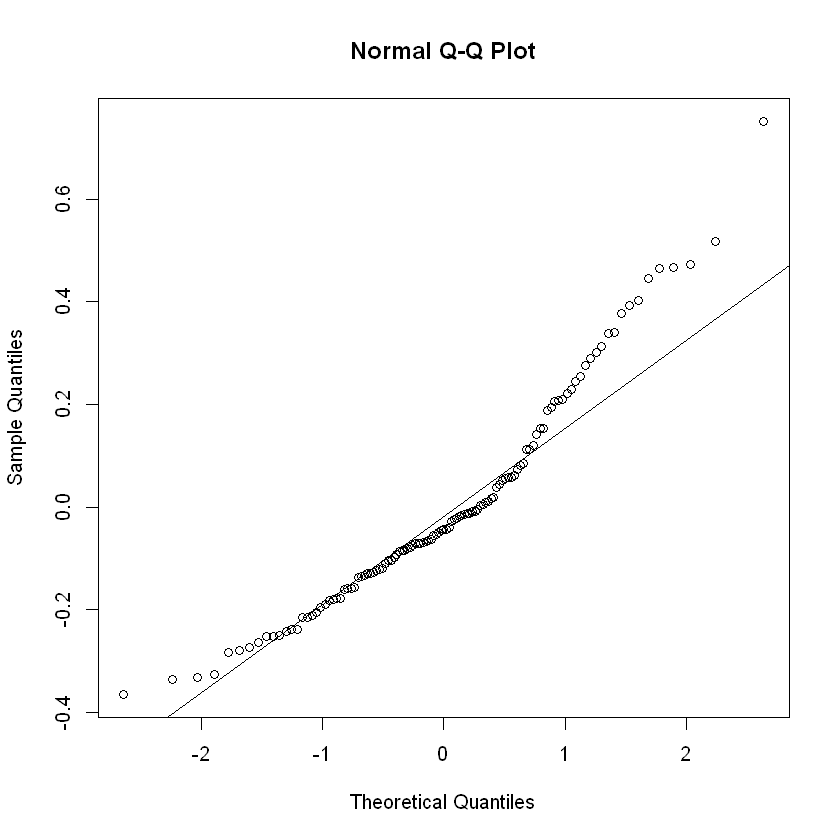

In [1324]:
# Q-Q Plot of ARMA(1,2) 
qqnorm(residuals(log.d1_2))
qqline(residuals(log.d1_2))

# Shapiro-Wilk's Normality Test
shapiro.test(residuals(log.d1_2))

### <span style='font-family:Garamond'> (iii) Test of Uncorrelated Residuals

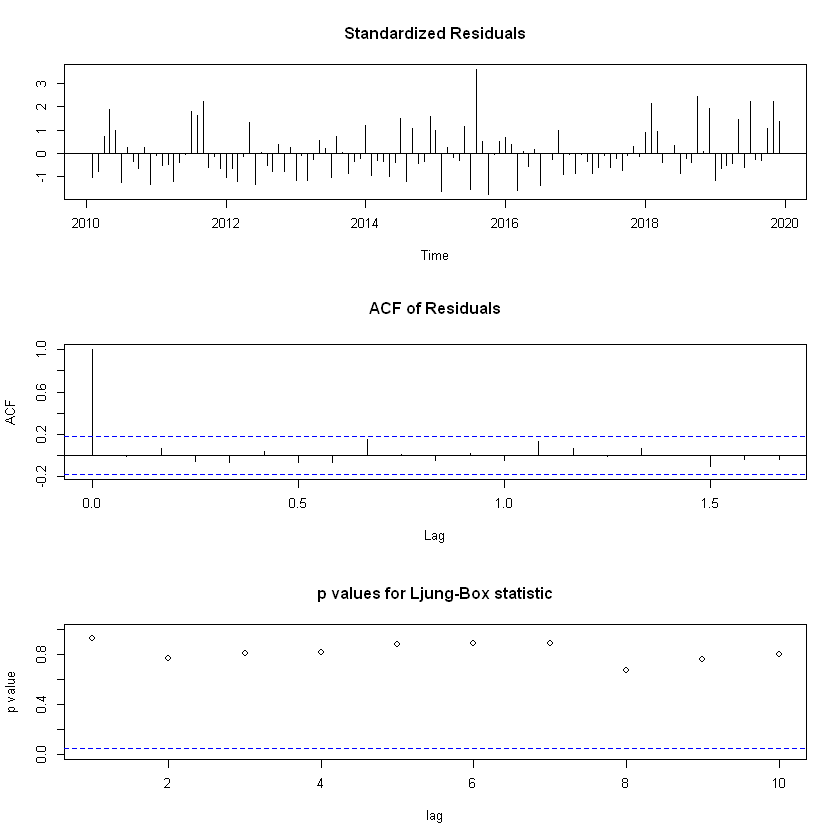

In [1328]:
# Standardized Residuals vs. Time(t) Plot
# ACF of Residual Plot
# Ljung-Box Plots
tsdiag(log.d1_2)

### <span style='font-family:Garamond'> (iv) Harmonic Mean of Residuals

In [1332]:
# Harmonic Mean of Residuals
har.log.d1_2 <- length(log.d1_2$residuals)/sum(1/abs(log.d1_2$residuals))
har.log.d1_2

[1] 0.04299399

### <span style='font-family:Garamond'> (v) AIC and BIC

In [ ]:
# AIC and BIC scores
AIC(log.d1_2)
BIC(log.d1_2)

## <span style='font-family:Garamond'> Candidate Model 3: ARMA(2, 1)

### <span style='font-family:Garamond'> (i) Fitting Model for Parameter Estimation 

In [1319]:
# ARMA(1,1) Parameter Estimation
log.d1_3 <- arima(log.d1, order=c(2,0,1), method='ML', include.mean=TRUE)
log.d1_3 


Call:
arima(x = log.d1, order = c(2, 0, 1), include.mean = TRUE, method = "ML")

Coefficients:
         ar1     ar2      ma1  intercept
      0.4911  0.0975  -0.8841    -0.0001
s.e.  0.1324  0.1095   0.0950     0.0059

sigma^2 estimated as 0.04372:  log likelihood = 17.15,  aic = -26.3

<font size="4">
<span style='font-family:Garamond'>
(Any comments if needed)

### <span style='font-family:Garamond'> (ii) Test of Normality of Residuals


	Shapiro-Wilk normality test

data:  residuals(log.d1_3)
W = 0.94369, p-value = 8.217e-05


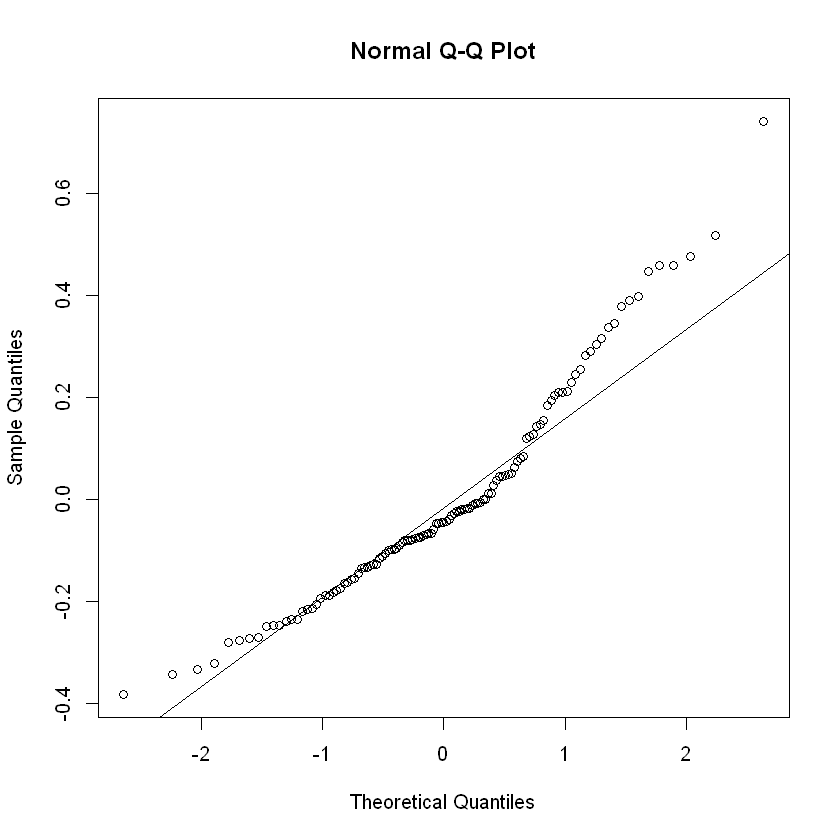

In [1325]:
# Q-Q Plot of ARMA(2,1) 
qqnorm(residuals(log.d1_3))
qqline(residuals(log.d1_3))

# Shapiro-Wilk's Normality Test
shapiro.test(residuals(log.d1_3))

### <span style='font-family:Garamond'> (iii) Test of Uncorrelated Residuals

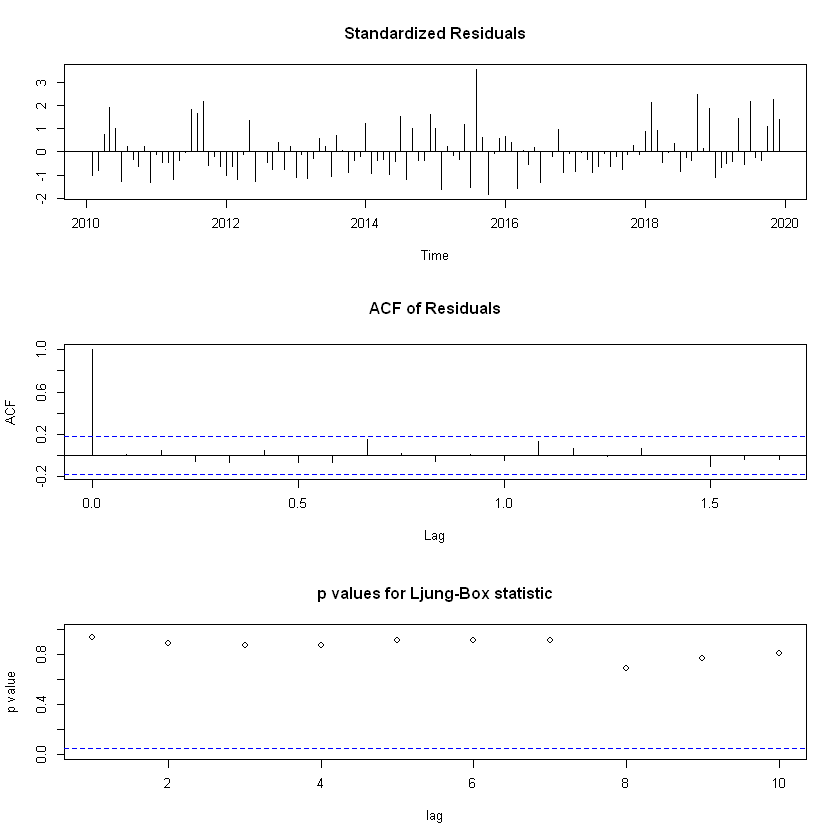

In [1327]:
# Standardized Residuals vs. Time(t) Plot
# ACF of Residual Plot
# Ljung-Box Plots
tsdiag(log.d1_3)

### <span style='font-family:Garamond'> (iv) Harmonic Mean of Residuals

In [1333]:
# Harmonic Mean of Residuals
har.log.d1_3 <- length(log.d1_3$residuals)/sum(1/abs(log.d1_3$residuals))
har.log.d1_3

[1] 0.003013783

### <span style='font-family:Garamond'> (v) AIC and BIC

In [1335]:
# AIC and BIC scores
AIC(log.d1_3)
BIC(log.d1_3)

[1] -24.30006

[1] -10.40444

## <span style='font-family:Garamond'> 7.2 Used R Packages

In [265]:
# R Packages Used
library(tidyverse)
library(tseries)
library(readxl)
library(TSA)
library(xts)
library(gdata)
library(astsa)
library(funtimes)

## <span style='font-family:Garamond'> 7.3  Figures

### <span style='font-family:Garamond'> [1].

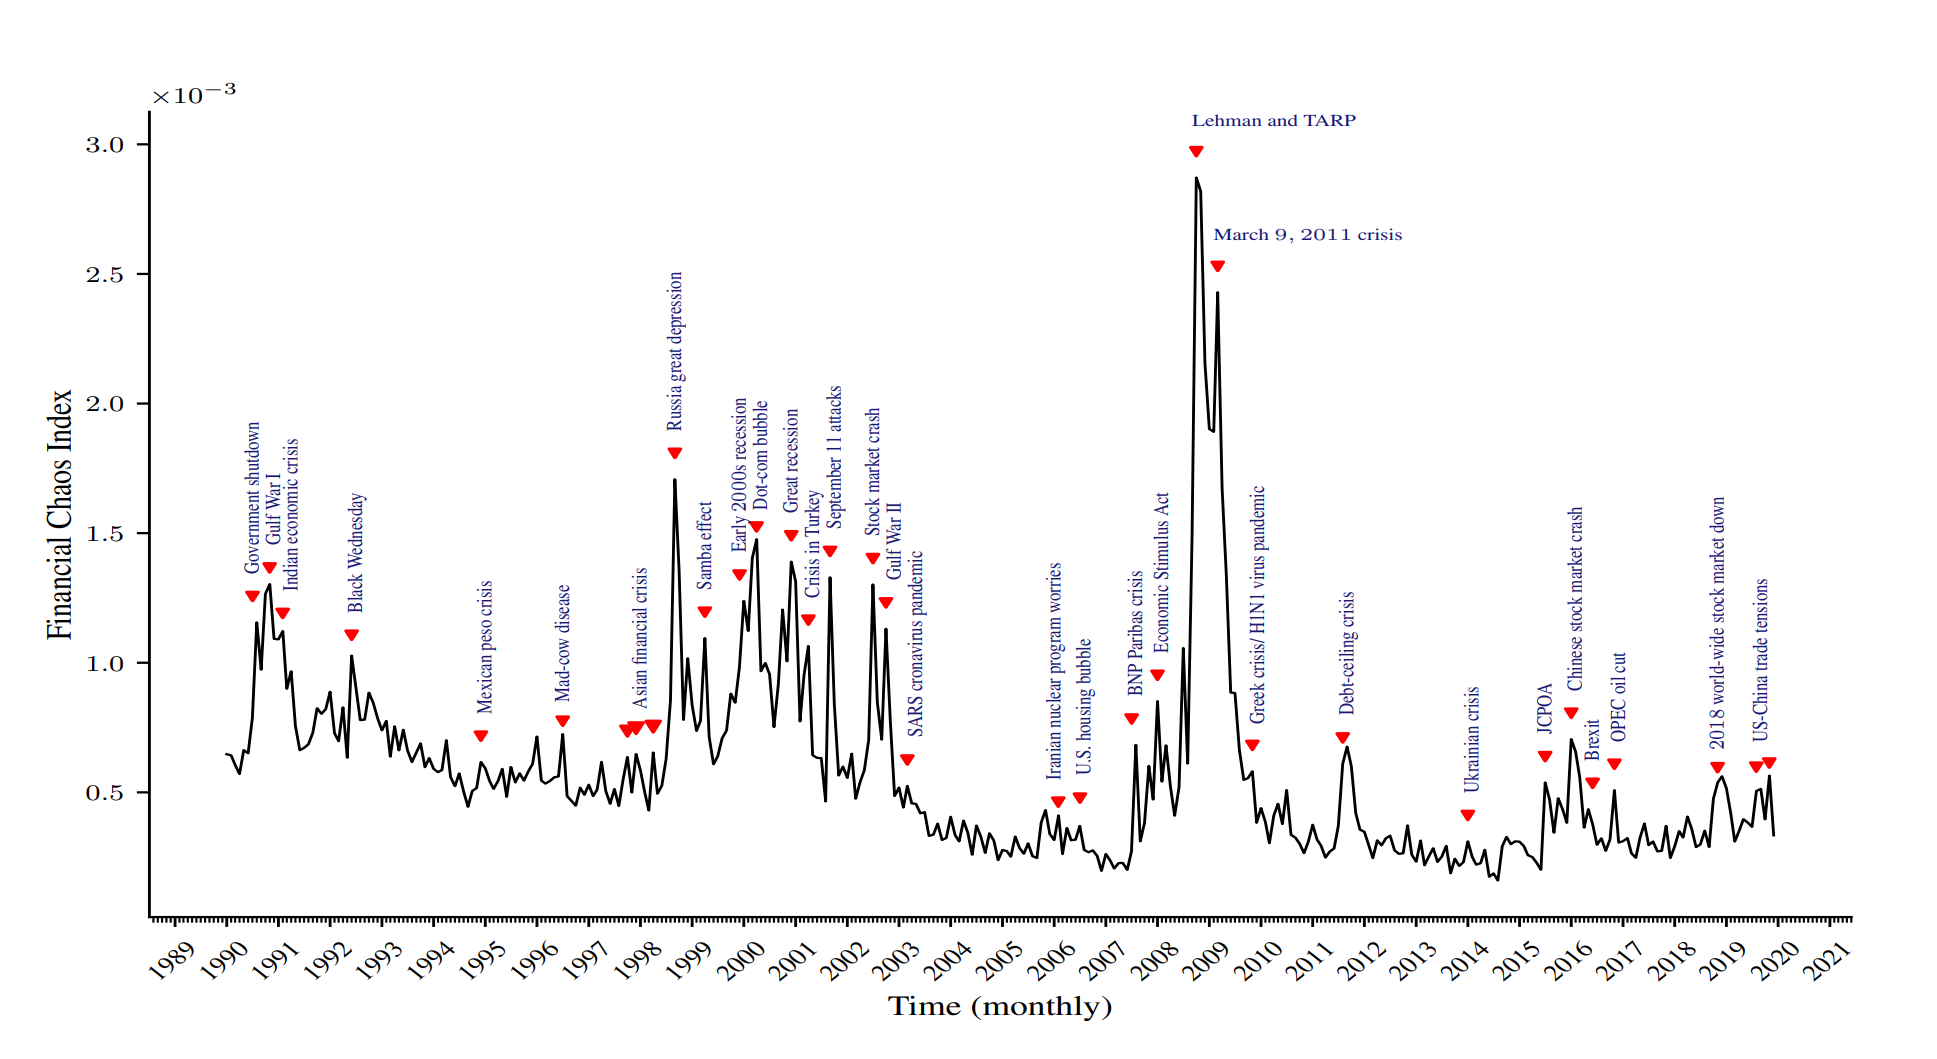
<center> 
Figure 1: Visualization of Monthly Volatility (1990 Jan. - 2021 Dec.) 

### <span style='font-family:Garamond'> [2].

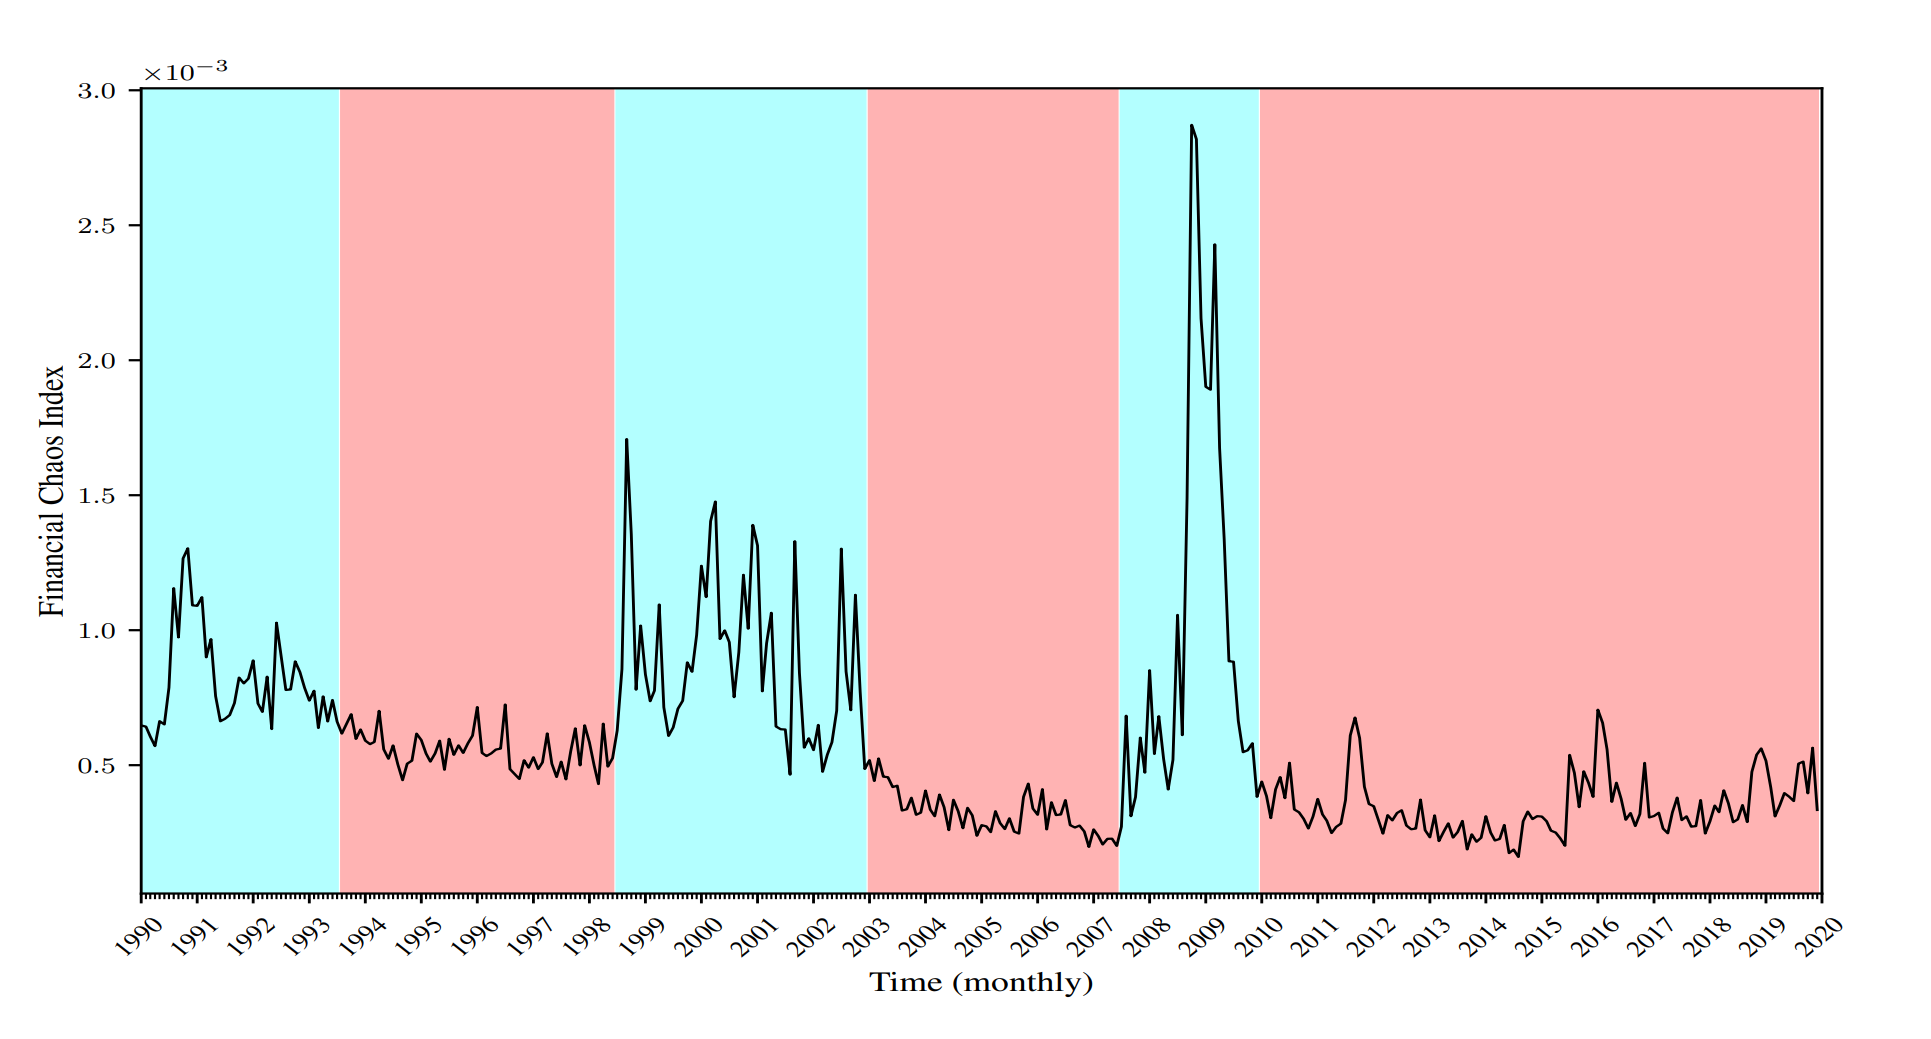
<center>
Figure 2: Visualization of Volaitility Segmentation (1990 Jan. - 2021 Dec.) 

### <span style='font-family:Garamond'> [3].

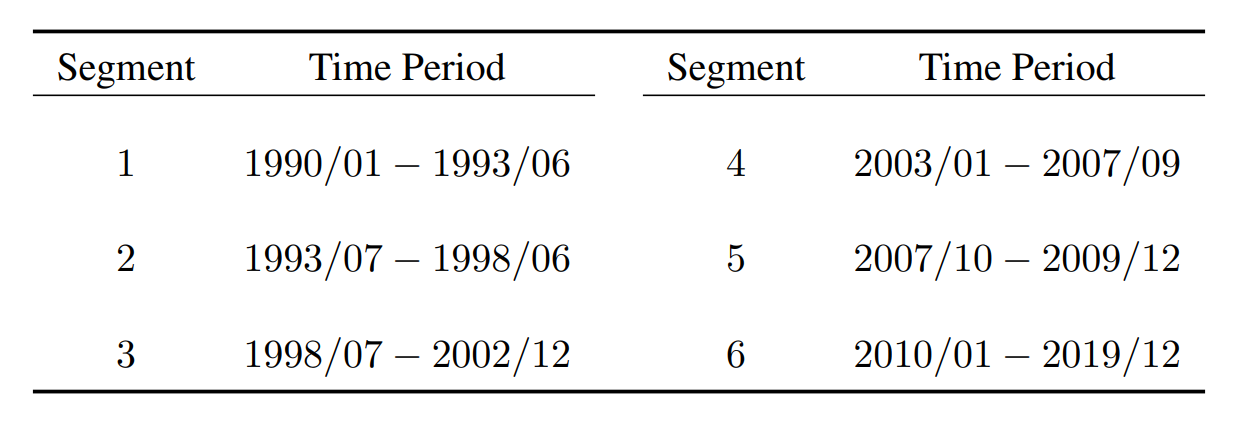
<center>
Figure 3: Table of Volatility Segments Dates (1990 Jan. - 2021 Dec.) 